# World Happiness Report 2015 - 2019

## Data Visualization

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.

Source: https://worldhappiness.report

Find important question about this Dataset in the following FAQs: https://worldhappiness.report/faq/

Further information under: https://en.wikipedia.org/wiki/World_Happiness_Report

Source of Dataset (as in January 2020): 

https://worldhappiness.report

# Executive Summary

In this notebook I try to give an insight to the world happiness report from 2015 untill 2019. First I start with the comparison for all years. I use different visualization tools on this dataset. To get a first overview of the data, I recommend to have a look in the Pandas Profiling. After that, I present the correlation and the regression in different scatterplots and headmaps. This visualization are the first steps for my hypothesis. In the second part of this notebook, I compare the features only for the year 2019. At the end, you will find different maps for each feature to get a better insight of the data.  

Used Library in Python:

In [13]:
import pandas as pd
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.offline as py
import plotly.graph_objs as go
import squarify
import plotly.express as px
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [14]:
tabelle = pd.read_excel("WorldHappinessReportData2015-2019.xlsx", sheet_name=['All Years'])

First 10 lines of the full dataset. 

In [15]:
df = tabelle['All Years']
df.head(10)

Country                     Region  Year  HappinessRank  \
0  Switzerland             Western Europe  2015              1   
1      Iceland             Western Europe  2015              2   
2      Denmark             Western Europe  2015              3   
3       Norway             Western Europe  2015              4   
4       Canada              North America  2015              5   
5      Finland             Western Europe  2015              6   
6  Netherlands             Western Europe  2015              7   
7       Sweden             Western Europe  2015              8   
8  New Zealand  Australia and New Zealand  2015              9   
9    Australia  Australia and New Zealand  2015             10   

   HappinessScore  Standard Error  Lower Confidence Interval  \
0           7.587         0.03411                        NaN   
1           7.561         0.04884                        NaN   
2           7.527         0.03328                        NaN   
3           7.522         0.03880                        NaN   
4           7.427         0.03553                        NaN   
5           7.406         0.03140                        NaN   
6           7.378         0.02799                        NaN   
7           7.364         0.03157                        NaN   
8           7.286         0.03371                        NaN   
9           7.284         0.04083                        NaN   

   Upper Confidence Interval  Whisker.high  Whisker.low  EconomyGDP   Family  \
0                        NaN           NaN          NaN     1.39651  1.34951   
1                        NaN           NaN          NaN     1.30232  1.40223   
2                        NaN           NaN          NaN     1.32548  1.36058   
3                        NaN           NaN          NaN     1.45900  1.33095   
4                        NaN           NaN          NaN     1.32629  1.32261   
5                        NaN           NaN          NaN     1.29025  1.31826   
6                        NaN           NaN          NaN     1.32944  1.28017   
7                        NaN           NaN          NaN     1.33171  1.28907   
8                        NaN           NaN          NaN     1.25018  1.31967   
9                        NaN           NaN          NaN     1.33358  1.30923   

   HealthLifeExpectancy  Freedom  TrustGovernmenCorruption  Generosity  \
0               0.94143  0.66557                   0.41978     0.29678   
1               0.94784  0.62877                   0.14145     0.43630   
2               0.87464  0.64938                   0.48357     0.34139   
3               0.88521  0.66973                   0.36503     0.34699   
4               0.90563  0.63297                   0.32957     0.45811   
5               0.88911  0.64169                   0.41372     0.23351   
6               0.89284  0.61576                   0.31814     0.47610   
7               0.91087  0.65980                   0.43844     0.36262   
8               0.90837  0.63938                   0.42922     0.47501   
9               0.93156  0.65124                   0.35637     0.43562   

   DystopiaResidual  
0           2.51738  
1           2.70201  
2           2.49204  
3           2.46531  
4           2.45176  
5           2.61955  
6           2.46570  
7           2.37119  
8           2.26425  
9           2.26646

General information about the data. We have a lot of missing values for Standard Error, Confidence Interval and Whisker information.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    782 non-null    object 
 1   Region                     782 non-null    object 
 2   Year                       782 non-null    int64  
 3   HappinessRank              782 non-null    int64  
 4   HappinessScore             782 non-null    float64
 5   Standard Error             158 non-null    float64
 6   Lower Confidence Interval  157 non-null    float64
 7   Upper Confidence Interval  157 non-null    float64
 8   Whisker.high               467 non-null    float64
 9   Whisker.low                467 non-null    float64
 10  EconomyGDP                 782 non-null    float64
 11  Family                     782 non-null    float64
 12  HealthLifeExpectancy       782 non-null    float64
 13  Freedom                    782 non-null    float64

Standard Error, Lower and Uper Confidence Interval, Whisker High and Low will be removed:

In [17]:
del df['Standard Error']
del df['Lower Confidence Interval']
del df['Upper Confidence Interval']
del df['Whisker.high']
del df['Whisker.low']

### Mean across years - Sorted by Happiness Score - Top 10

In [18]:
df_mean = df.groupby('Country').mean()
del df_mean['Year']
df_mean[df_mean[df[1:]].isna().any(axis=1)].sort_values(by = 'HappinessScore',ascending = False).head(10)

HappinessRank  HappinessScore  EconomyGDP    Family  \
Country                                                            
Denmark                2.2         7.54602    1.396816  1.447607   
Norway                 2.8         7.54098    1.519334  1.430984   
Finland                3.6         7.53778    1.357009  1.434484   
Switzerland            3.6         7.51144    1.472213  1.417388   
Iceland                3.2         7.51092    1.386555  1.492743   
Netherlands            6.2         7.40452    1.411017  1.349627   
Canada                 6.8         7.35062    1.388108  1.387360   
Sweden                 8.6         7.31926    1.403897  1.368636   
New Zealand            8.2         7.31310    1.317426  1.439776   
Australia             10.0         7.27620    1.394794  1.408998   

             HealthLifeExpectancy   Freedom  TrustGovernmenCorruption  \
Country                                                                 
Denmark                  0.865253  0.626031                  0.420371   
Norway                   0.873358  0.638148                  0.353137   
Finland                  0.873865  0.621515                  0.371031   
Switzerland              0.928316  0.620545                  0.364395   
Iceland                  0.917675  0.618016                  0.204544   
Netherlands              0.878632  0.589666                  0.336176   
Canada                   0.900520  0.610945                  0.335488   
Sweden                   0.899032  0.617665                  0.397742   
New Zealand              0.891545  0.617812                  0.423509   
Australia                0.914436  0.605078                  0.349868   

             Generosity  DystopiaResidual  
Country                                    
Denmark        0.328038          2.461641  
Norway         0.319842          2.406198  
Finland        0.245150          2.636911  
Switzerland    0.292816          2.416074  
Iceland        0.354793          2.536592  
Netherlands    0.377672          2.461863  
Canada         0.359968          2.368463  
Sweden         0.336317          2.295691  
New Zealand    0.409336          2.213839  
Australia      0.380685          2.222339

### Mean across years - Sorted by Happiness Score - Bottom 10

In [19]:
df_mean = df.groupby('Country').mean()
del df_mean['Year']
df_mean[df_mean[df[1:]].isna().any(axis=1)].sort_values(by = 'HappinessScore',ascending = False).tail(10)

HappinessRank  HappinessScore  EconomyGDP    Family  \
Country                                                                         
Madagascar                       145.00         3.74534    0.265933  0.773257   
Yemen                            146.40         3.62576    0.489295  0.865382   
Togo                             148.20         3.54418    0.265923  0.323637   
Afghanistan                      149.40         3.51286    0.357040  0.409753   
Tanzania                         150.80         3.46594    0.439748  0.939351   
Rwanda                           152.00         3.43856    0.322155  0.788463   
South Sudan                      150.00         3.38240    0.358508  0.492362   
Syria                            152.60         3.29218    0.699060  0.355866   
Central African Republic         153.25         3.13425    0.032227  0.000000   
Burundi                          153.80         3.07906    0.062411  0.470909   

                          HealthLifeExpectancy   Freedom  \
Country                                                    
Madagascar                            0.434014  0.177334   
Yemen                                 0.365348  0.244189   
Togo                                  0.288486  0.363741   
Afghanistan                           0.254631  0.117924   
Tanzania                              0.396686  0.386910   
Rwanda                                0.417542  0.581525   
South Sudan                           0.198236  0.116474   
Syria                                 0.566194  0.081664   
Central African Republic              0.050277  0.322477   
Burundi                               0.211668  0.101302   

                          TrustGovernmenCorruption  Generosity  \
Country                                                          
Madagascar                                0.090909    0.164991   
Yemen                                     0.076586    0.087551   
Togo                                      0.121276    0.154454   
Afghanistan                               0.108211    0.217618   
Tanzania                                  0.141377    0.254164   
Rwanda                                    0.432940    0.266735   
South Sudan                               0.153087    0.200467   
Syria                                     0.227973    0.362780   
Central African Republic                  0.109259    0.186991   
Burundi                                   0.131123    0.161872   

                          DystopiaResidual  
Country                                     
Madagascar                        1.838936  
Yemen                             1.497399  
Togo                              2.026282  
Afghanistan                       2.047492  
Tanzania                          0.907668  
Rwanda                            0.629177  
South Sudan                       1.863456  
Syria                             0.998736  
Central African Republic          2.432741  
Burundi                           1.939453

# Pie chart

In [20]:
#import plotly.offline as py
#import plotly.graph_objs as go

df2019 = df[df.Year == 2019]
del df2019['Year']

d2019 = df2019['Region'].value_counts()

label_d2019 = d2019.index
size_d2019 = d2019.values


colors = ['aqua', 'gold', 'yellow', 'crimson', 'magenta']
trace = go.Pie(labels = label_d2019, values = size_d2019, marker = dict(colors = colors), name = '2019', hole = 0.3)
data = [trace]
layout1 = go.Layout(title = 'Countries per Regions')
fig = go.Figure(data = data, layout = layout1)
py.iplot(fig)

#### Countries per region:

In [21]:
d2019

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        21
Western Europe                     21
Middle East and Northern Africa    19
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

# Happiness Trend

In [22]:
#import plotly.graph_objs as go
layout = go.Layout(title="Happiness Trend (2015 - 2019)", font=dict(size=18), 
                   xaxis=dict(range = [2014.8, 2019.2], title='Year', titlefont=dict(size=18), 
                              tickfont=dict(size=14)),
                   yaxis=dict(range=[0, 8], title='Happiness', 
                              titlefont=dict(size=18), tickfont=dict(size=14)),
                   legend=dict(font=dict(size=14)))
fig = {'data': [{'x': df[df['Region'] == region].groupby('Year')
                 .agg({'HappinessScore': 'mean'}).reset_index()['Year'],
                 'y': df[df['Region'] == region].groupby('Year')
                 .agg({'HappinessScore': 'mean'}).reset_index()['HappinessScore'],
                 'name': region, 'mode': 'lines', } for region in df['Region'].unique()], 
       'layout': layout}
py.iplot(fig)

Pandas Profiling generates a profile Report form a pandas Dataframe. For each column the following statistic - if relevant for the column type - are represented in the report:

**Type inference:** detect the types of columns in a dataframe.

**Essentials:** type, unique values, missing values

**Quantile statistics** like minimum value, Q1, median, Q3, maximum, range, interquartile range

**Descriptive statistics** like mean, mode, standard deviation, sum, median absolute deviation, coefficient of variation, kurtosis, skewness

**Most frequent values**

**Histogram**

**Correlations** highlighting of highly correlated variables, Spearman, Pearson and Kendall matrices

**Missing values matrix**, count, heatmap and dendrogram of missing values



## Pandas Profiling

In [23]:
pandas_profiling.ProfileReport(df)

### Pair-Wise Scatter Plot for all Years:

In this pair-wise scatter plot, we see that there are some values, who can be highly correlated. 

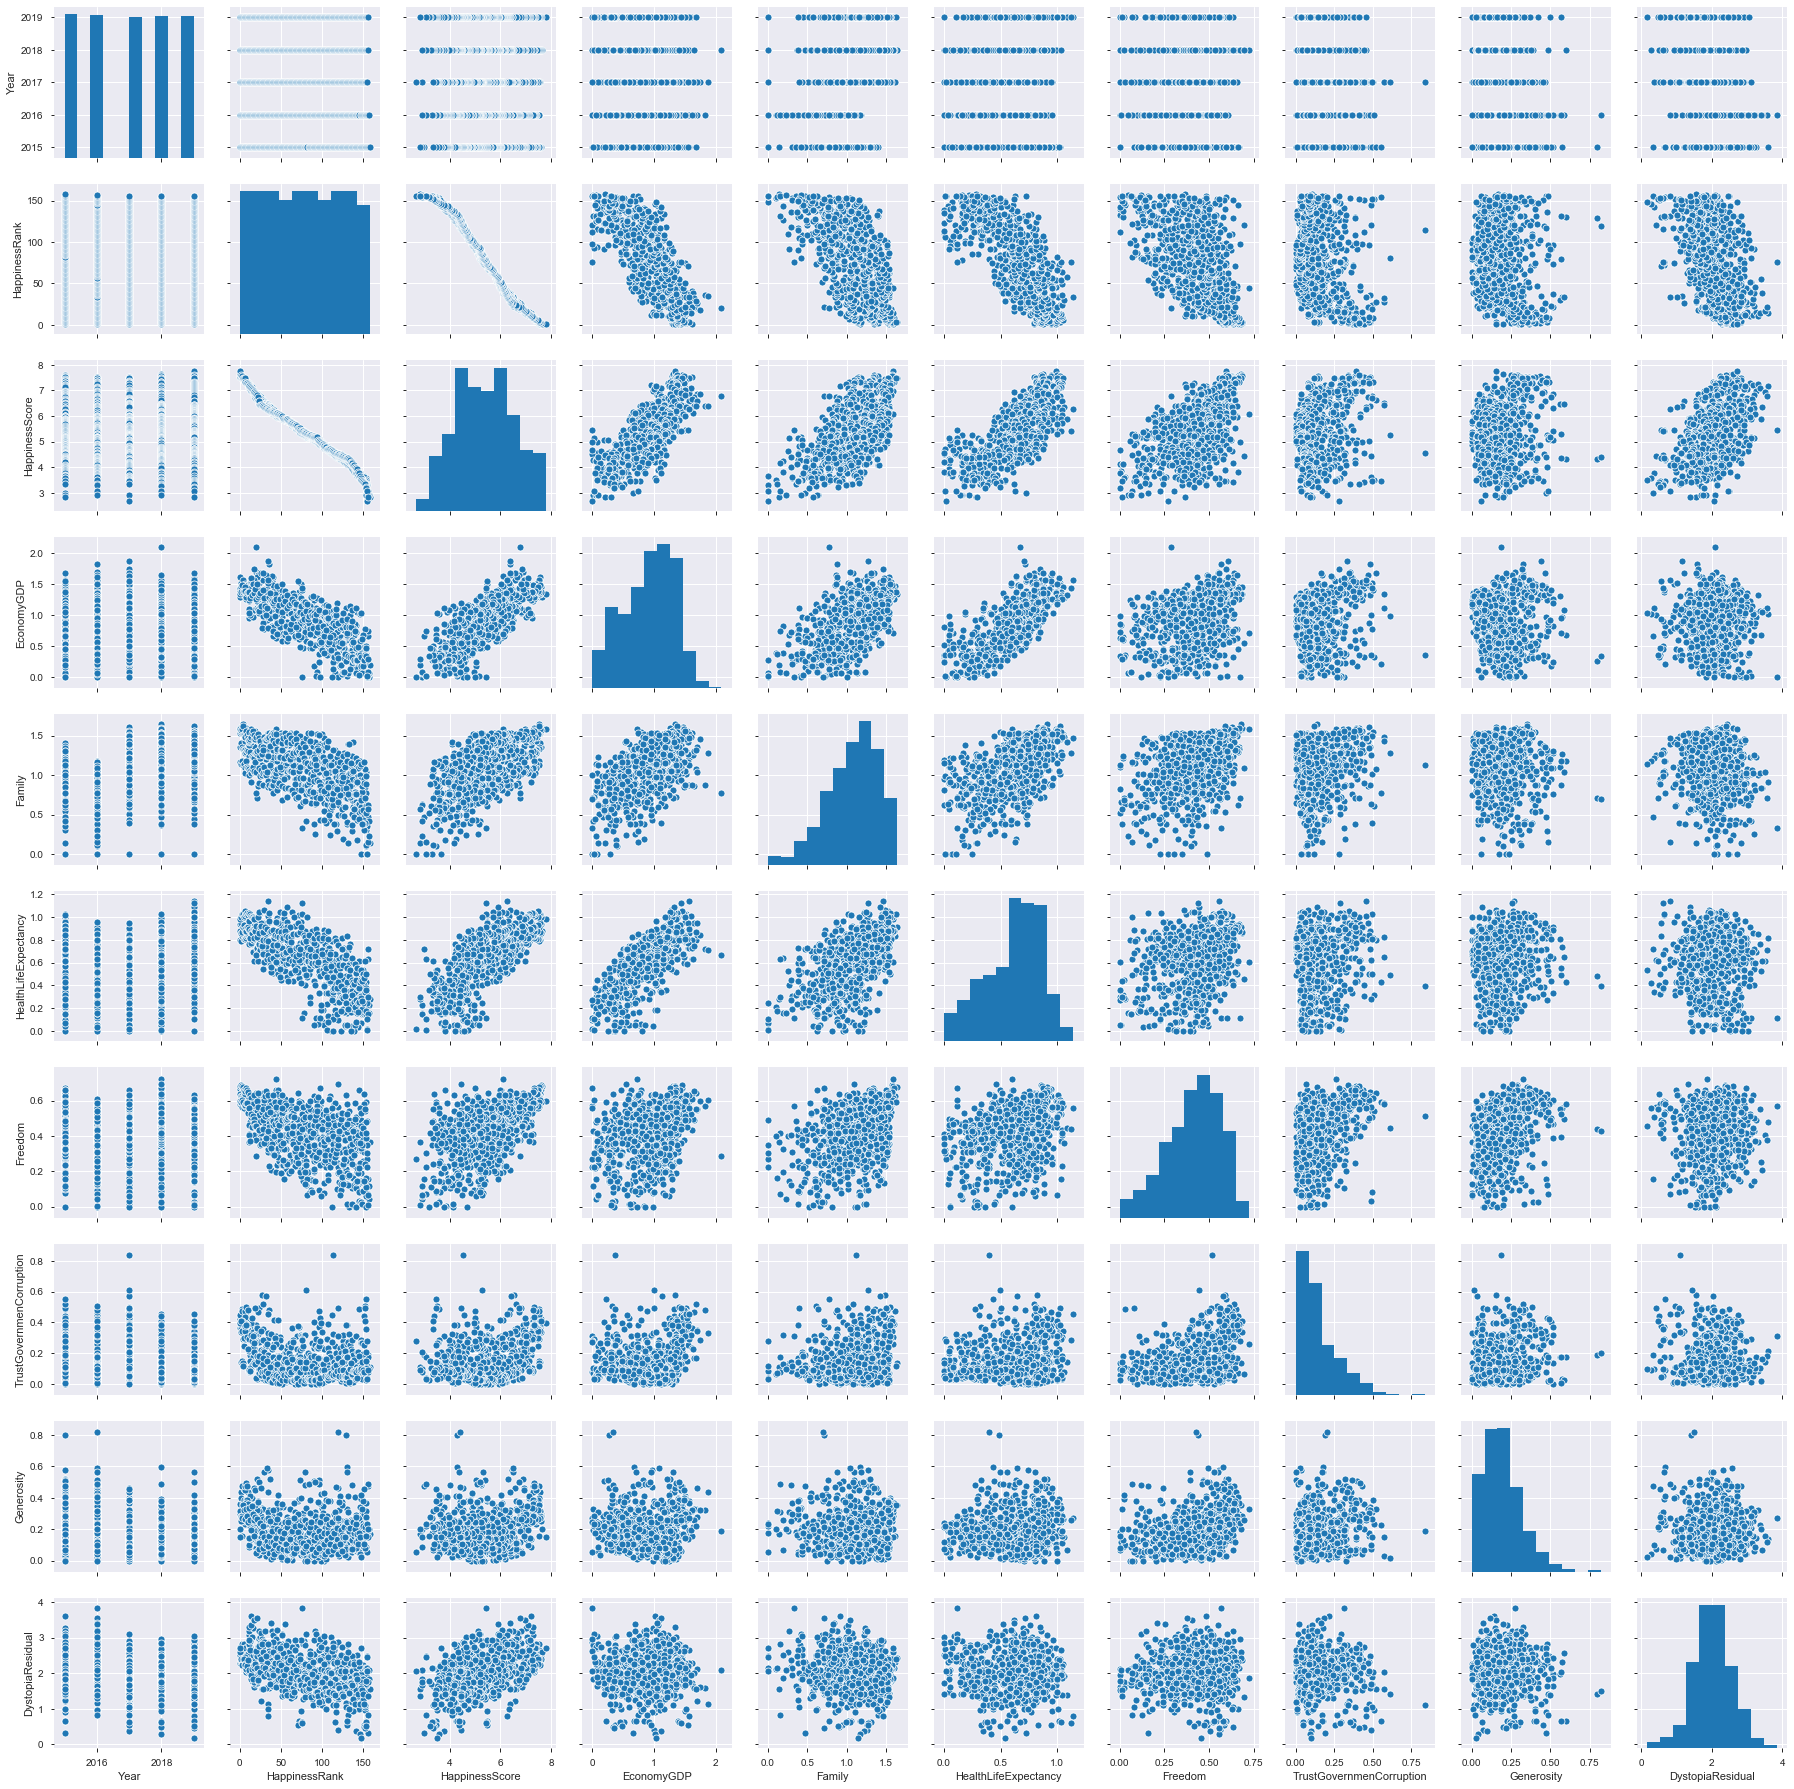

In [25]:
#import matplotlib.pyplot as plt

sns.pairplot(df)
plt.show()

### Scatter Plot with linear regression models

With the linear regression line we get a better insight of the data. 

Text(0.5, 0.98, 'World Happiness Report for 2015 - 2019 - Attributes Pairwise Plots')

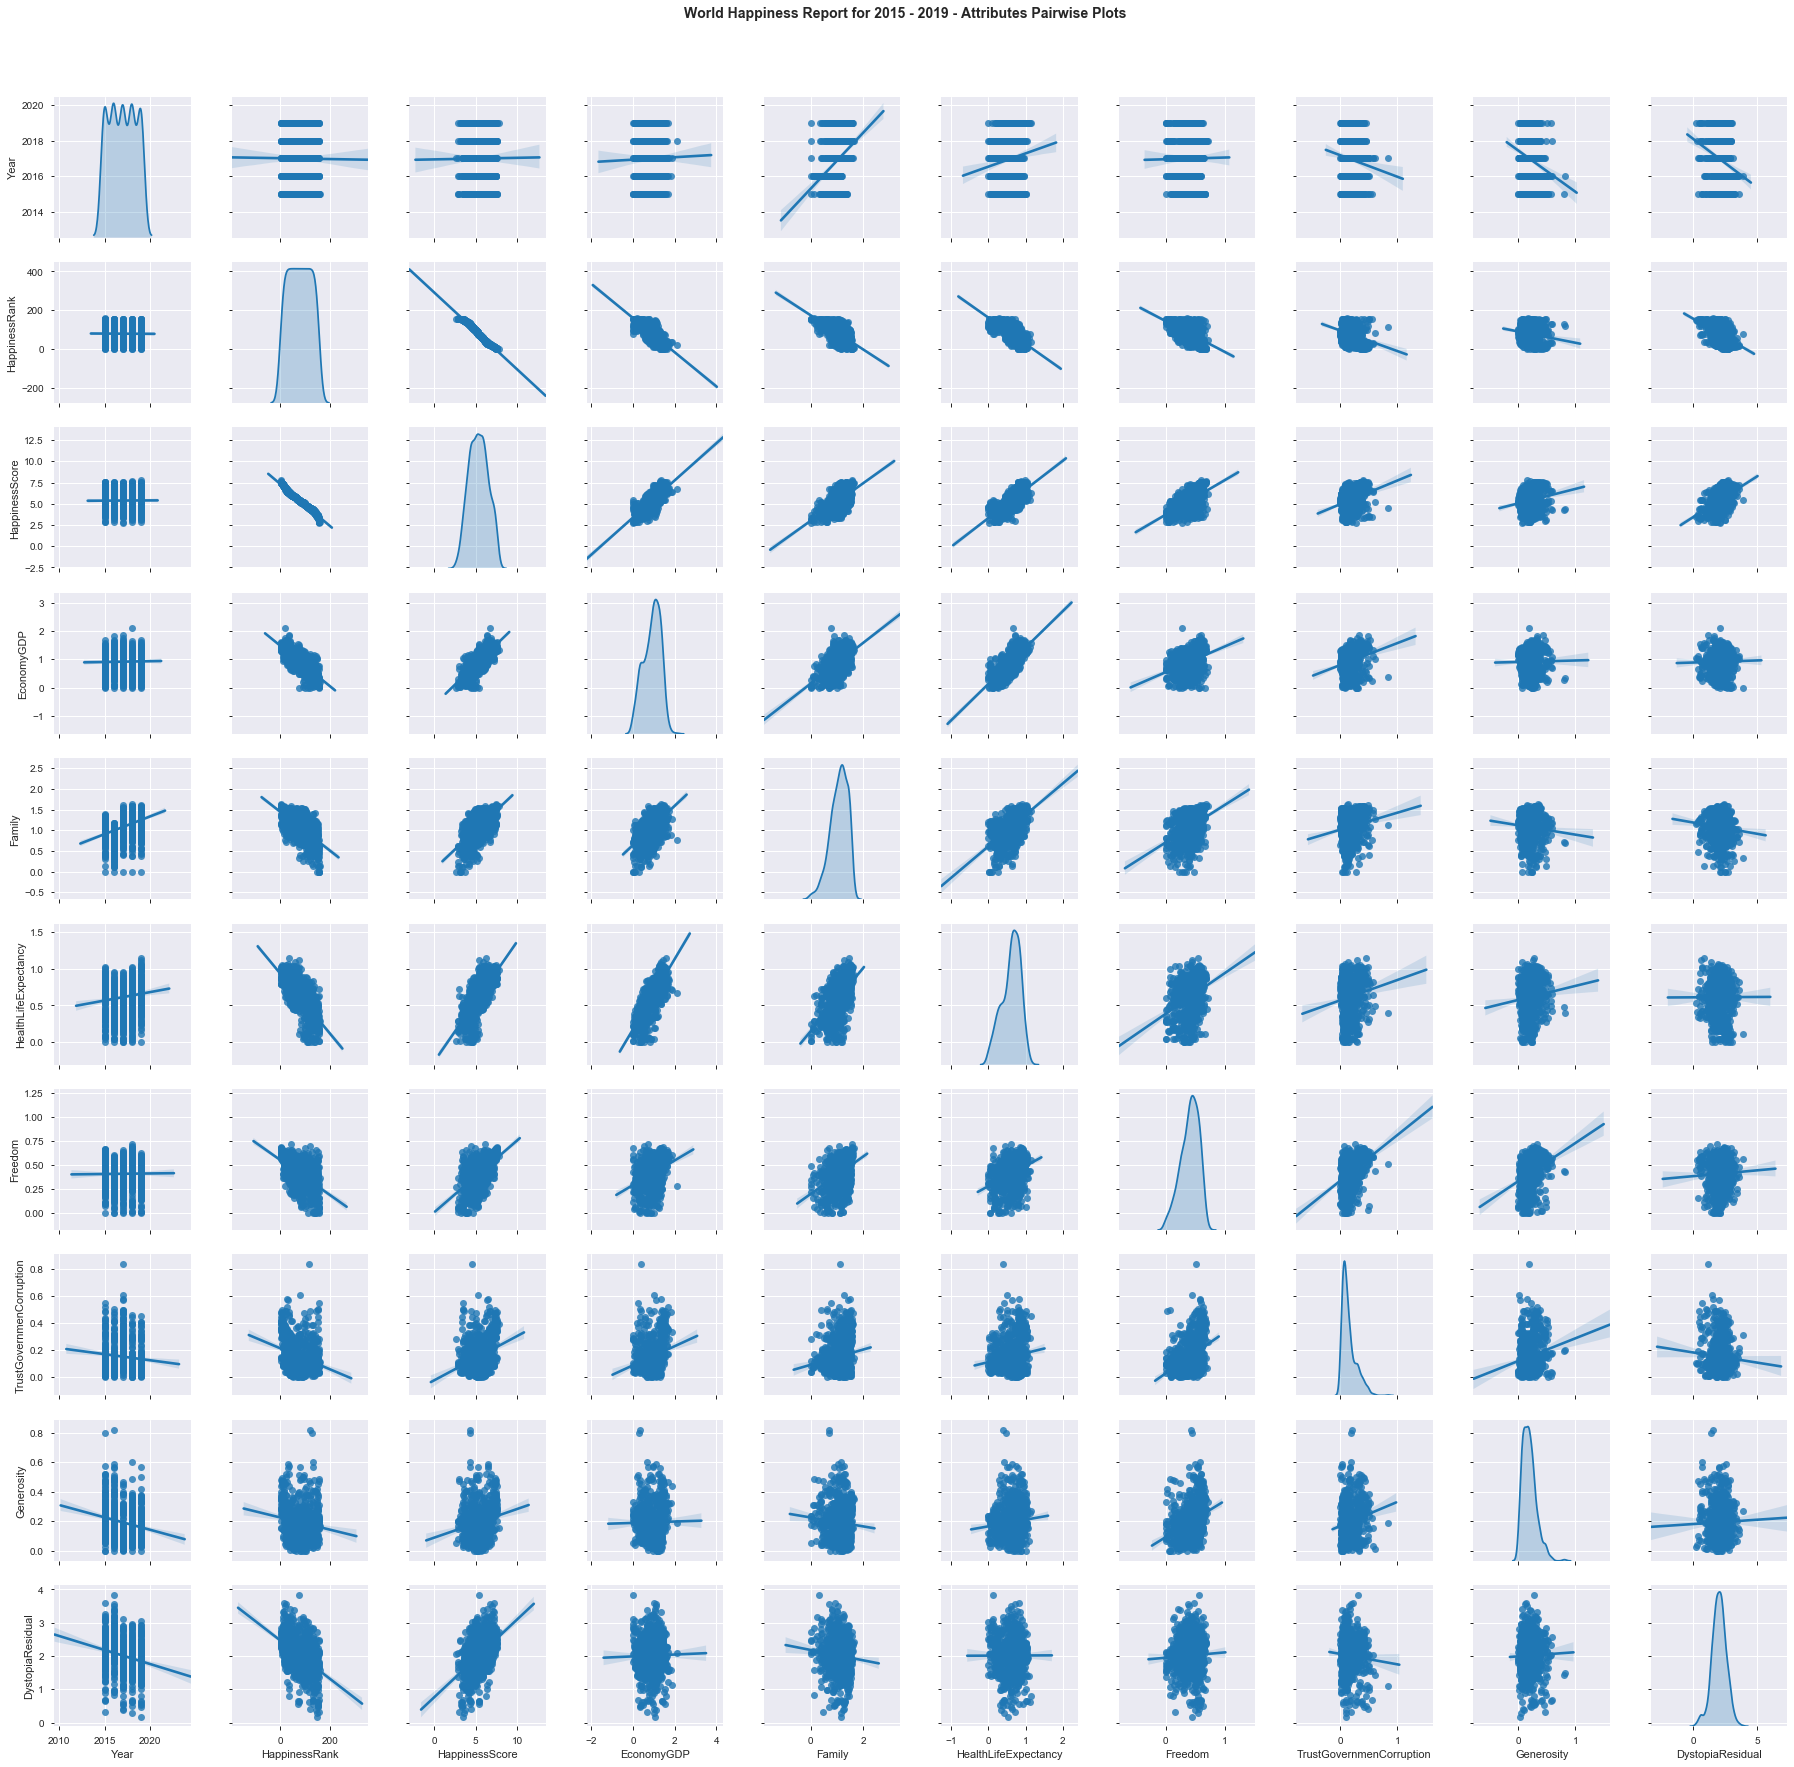

In [27]:
pp = sns.pairplot(df, diag_kws=dict(shade=True), diag_kind="kde", kind="reg")
    
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
fig.suptitle('World Happiness Report for 2015 - 2019 - Attributes Pairwise Plots', fontsize=14, fontweight='bold')

### Happiness Score vs. contintents for all years
Distribution of Happiness Score for all regions:

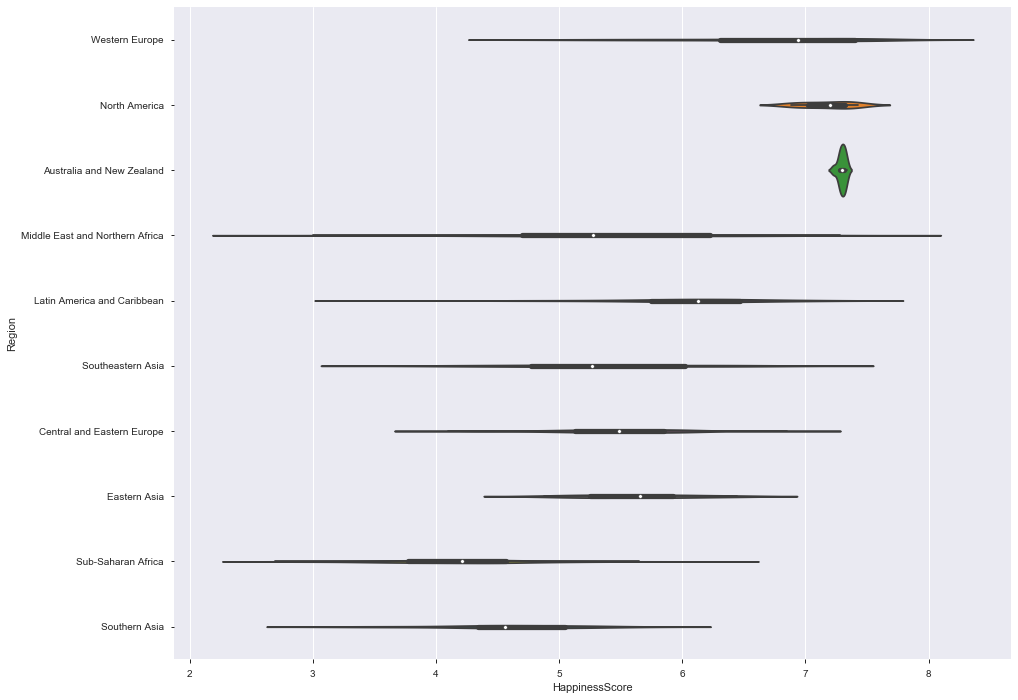

In [28]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 12)
sns.violinplot(df['HappinessScore'], df['Region'])
plt.show()

#### Boxplot Happiness Score per Region for all years

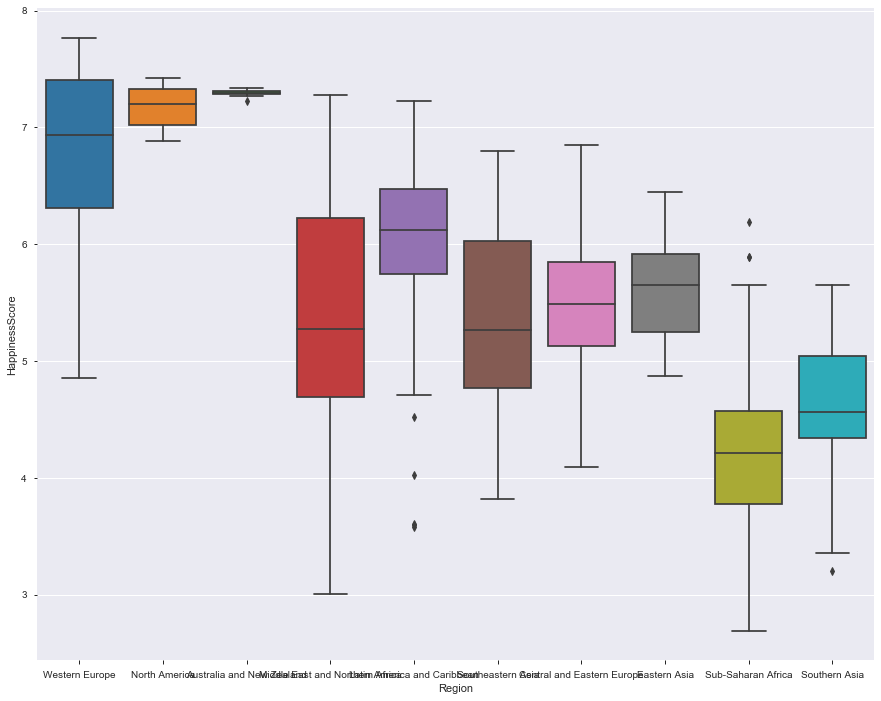

In [29]:
ax = sns.boxplot(x="Region", y="HappinessScore", data=df)

## Correlation Matrix for all years
### Headmap

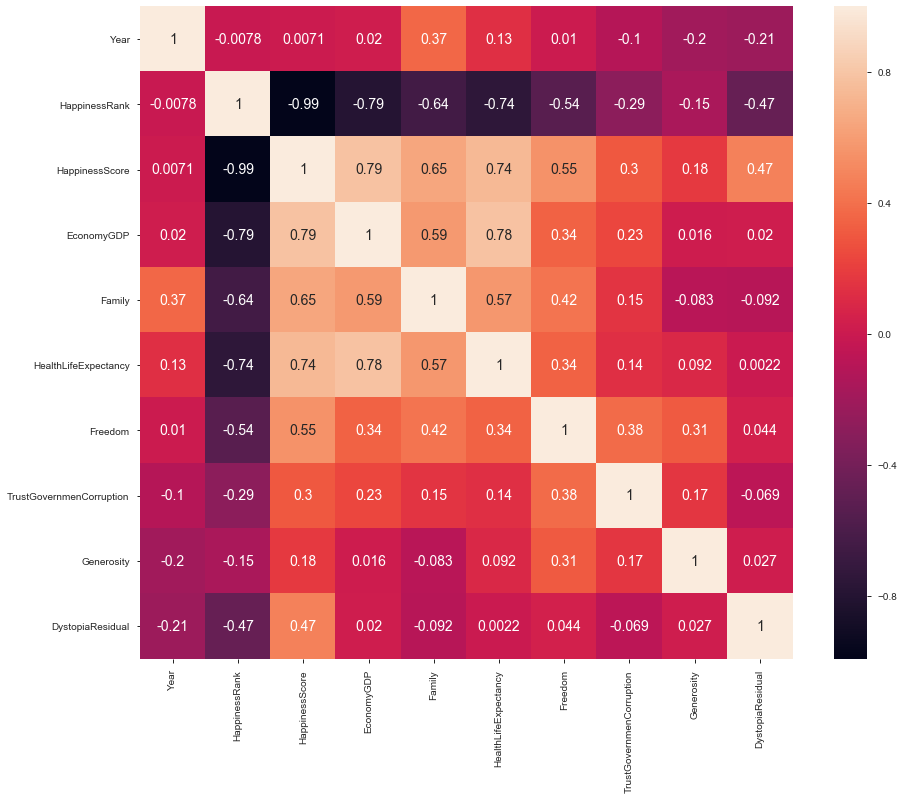

In [30]:
#import seaborn as sns
sns.heatmap(df.corr(), square = True, annot=True, annot_kws={"size": 14})

In the Heat Map above we see that the Happiness Score is highly correlated with Economy, Family, Health Life Expectancy and somewhat related with Fredom and Dystopia Residuals.
Another insight in this headmap is, that Economy and Health are also highly correlated. 

### Correlation divided by continent for all years:

#### Correlation for Western Europe

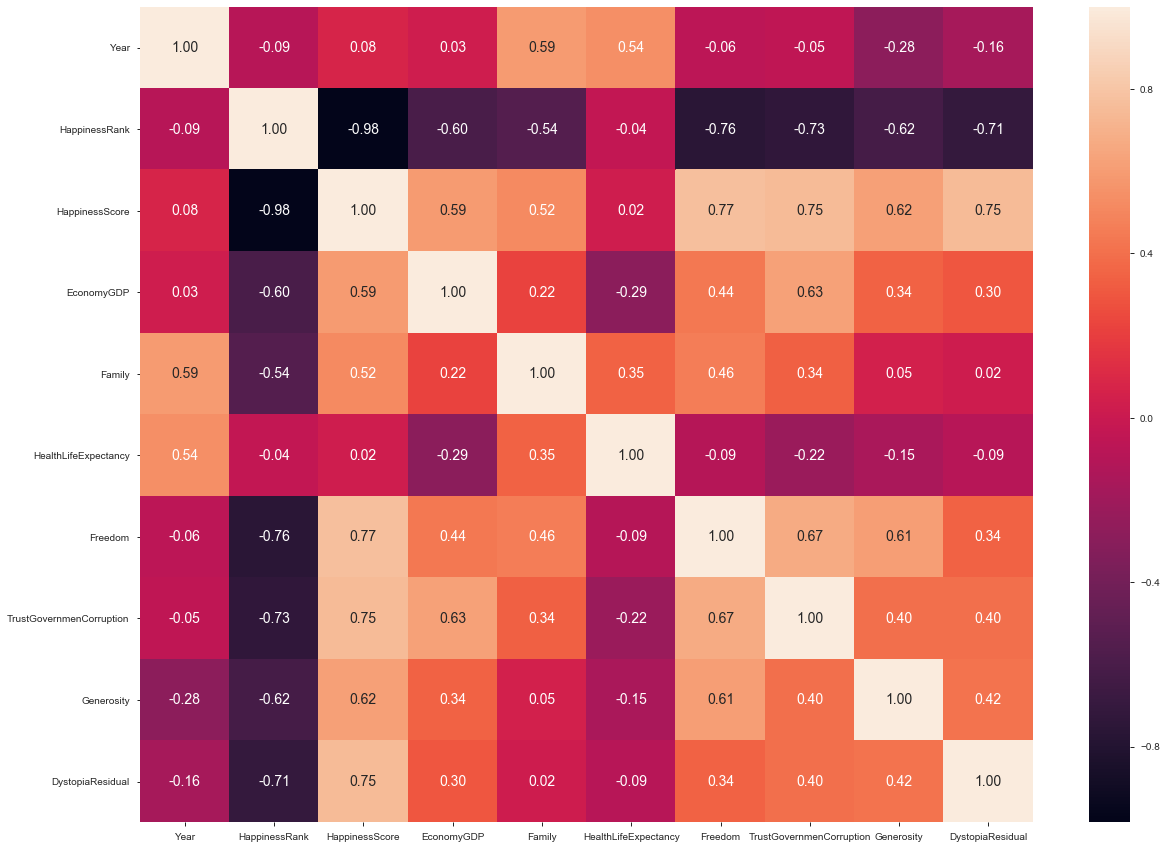

In [31]:
plt.rcParams['figure.figsize'] = (20, 15)
d = df.loc[lambda df: df['Region'] == 'Western Europe']
sns.heatmap(d.corr(),fmt='.2f', annot=True, annot_kws={"size": 14})
plt.show()

For Western Europe we see, that Economy doesn't play an important role as for the hole world. The most important feature for europe are Freedom, Corruption and Dystopia Residual. 

#### Correlation for North America

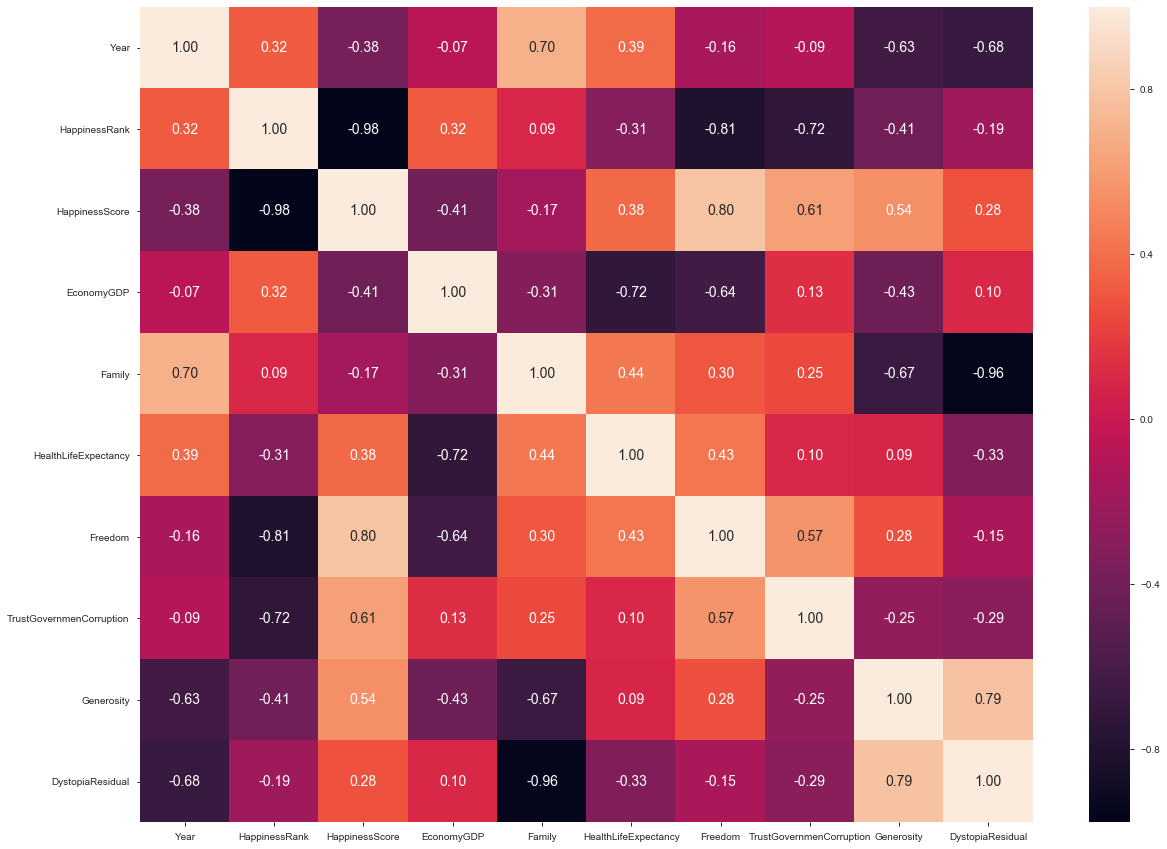

In [32]:
plt.rcParams['figure.figsize'] = (20, 15)
d = df.loc[lambda df: df['Region'] == 'North America']
sns.heatmap(d.corr(),fmt='.2f', annot=True, annot_kws={"size": 14})
plt.show()

Keep on rockin' in the free world. A happy guy in north america is a free one, as we see in this headmap. Happiness Score and Economy are negatively correlated. 

#### Correlation for Australia and New Zealand

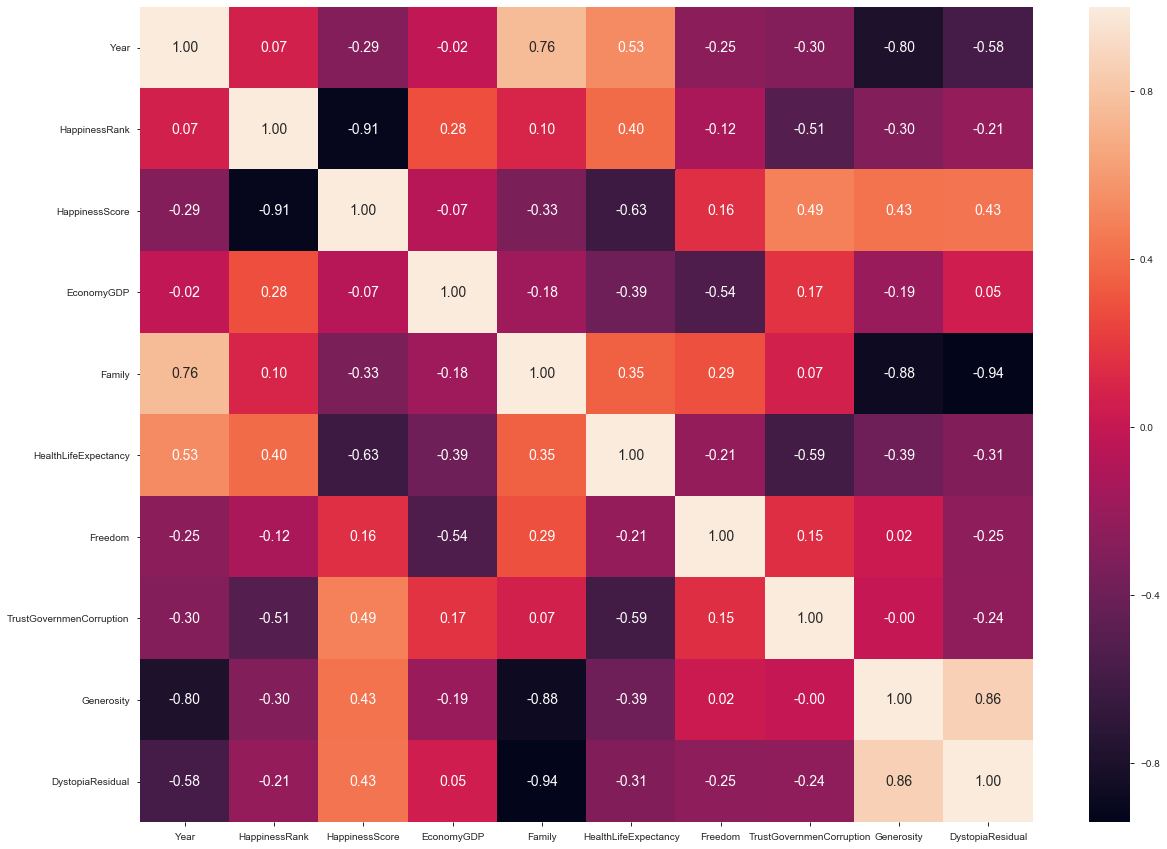

In [33]:
plt.rcParams['figure.figsize'] = (20, 15)
d = df.loc[lambda df: df['Region'] == 'Australia and New Zealand']
sns.heatmap(d.corr(),fmt='.2f', annot=True, annot_kws={"size": 14})
plt.show()

In Australia and New Zealand, Happiness Score isn't highly correlated with the feature at all. We find here the highest correlation between Generosity and DystopiaResidual. 

#### Correlation for Middle East and Northern Africa

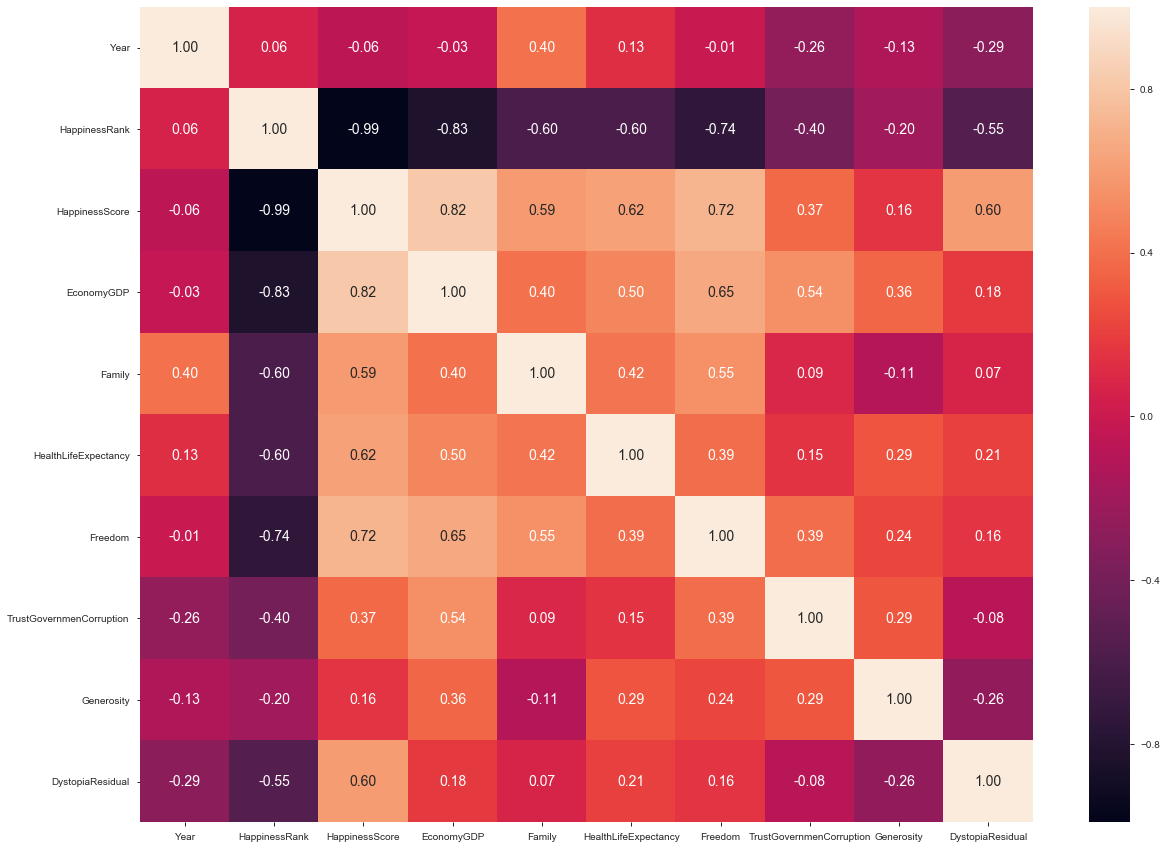

In [34]:
plt.rcParams['figure.figsize'] = (20, 15)
d = df.loc[lambda df: df['Region'] == 'Middle East and Northern Africa']
sns.heatmap(d.corr(),fmt='.2f', annot=True, annot_kws={"size": 14})
plt.show()

The important feature for Middle East and Northern Africa are Economy and Freedom.

#### Correlation for Latin America and Caribbean

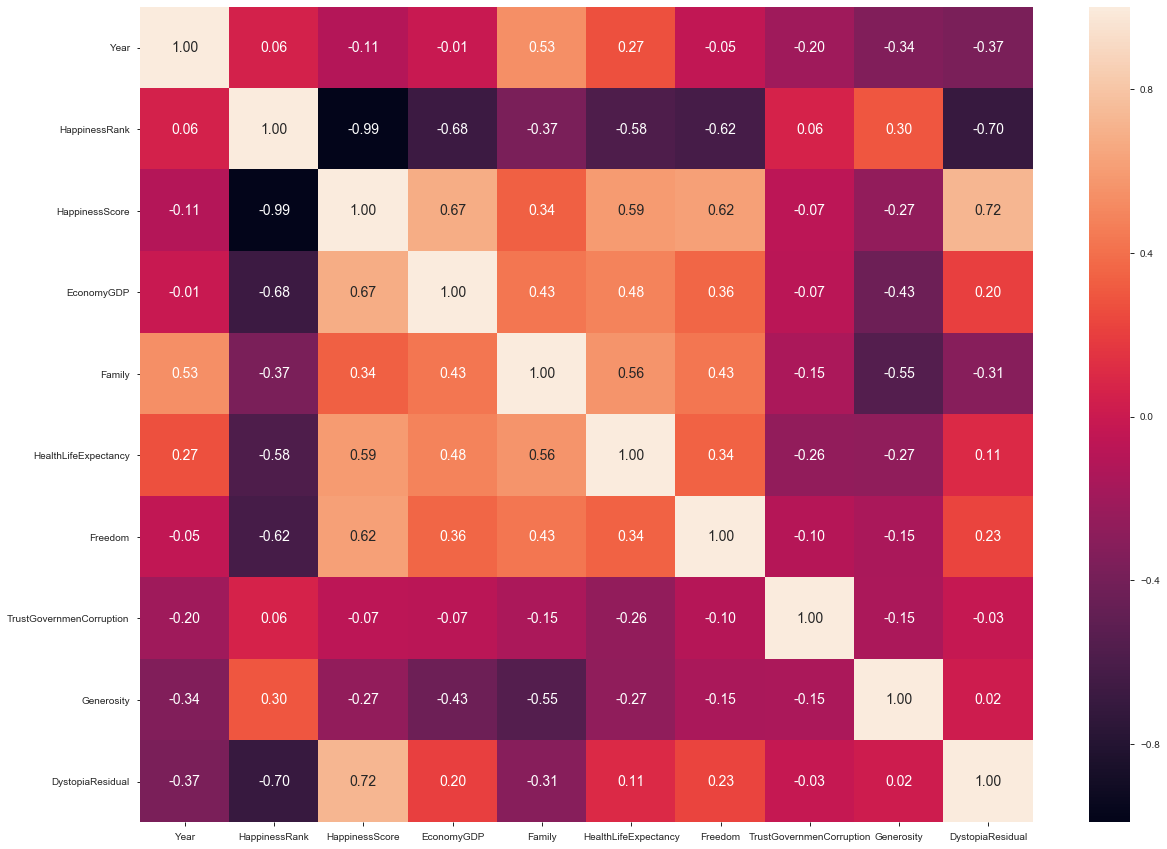

In [35]:
plt.rcParams['figure.figsize'] = (20, 15)
d = df.loc[lambda df: df['Region'] == 'Latin America and Caribbean']
sns.heatmap(d.corr(),fmt='.2f', annot=True, annot_kws={"size": 14})
plt.show()

#### Correlation for Southeastern Asia

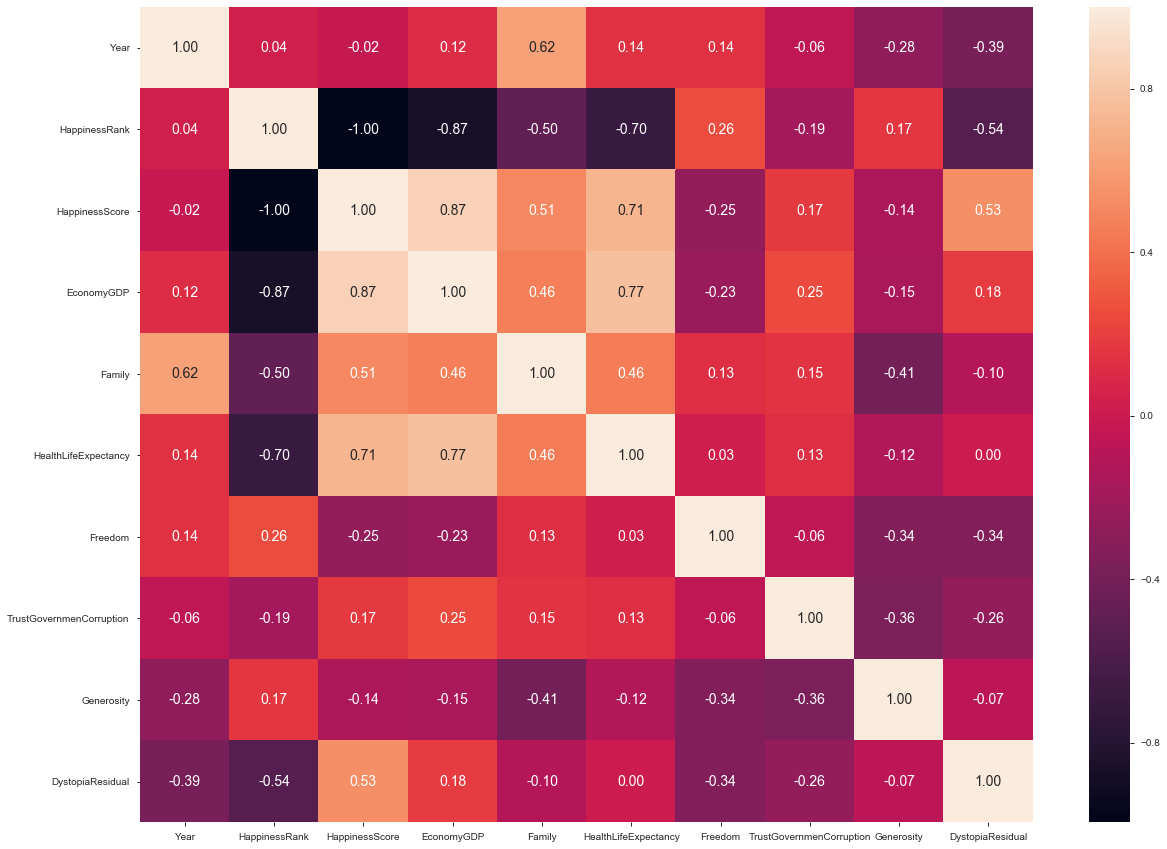

In [36]:
plt.rcParams['figure.figsize'] = (20, 15)
d = df.loc[lambda df: df['Region'] == 'Southeastern Asia']
sns.heatmap(d.corr(),fmt='.2f', annot=True, annot_kws={"size": 14})
plt.show()

For southerneast Asia, the important feature for the correlation are Economy and Health. 

#### Correlation for Central and Eastern Europe

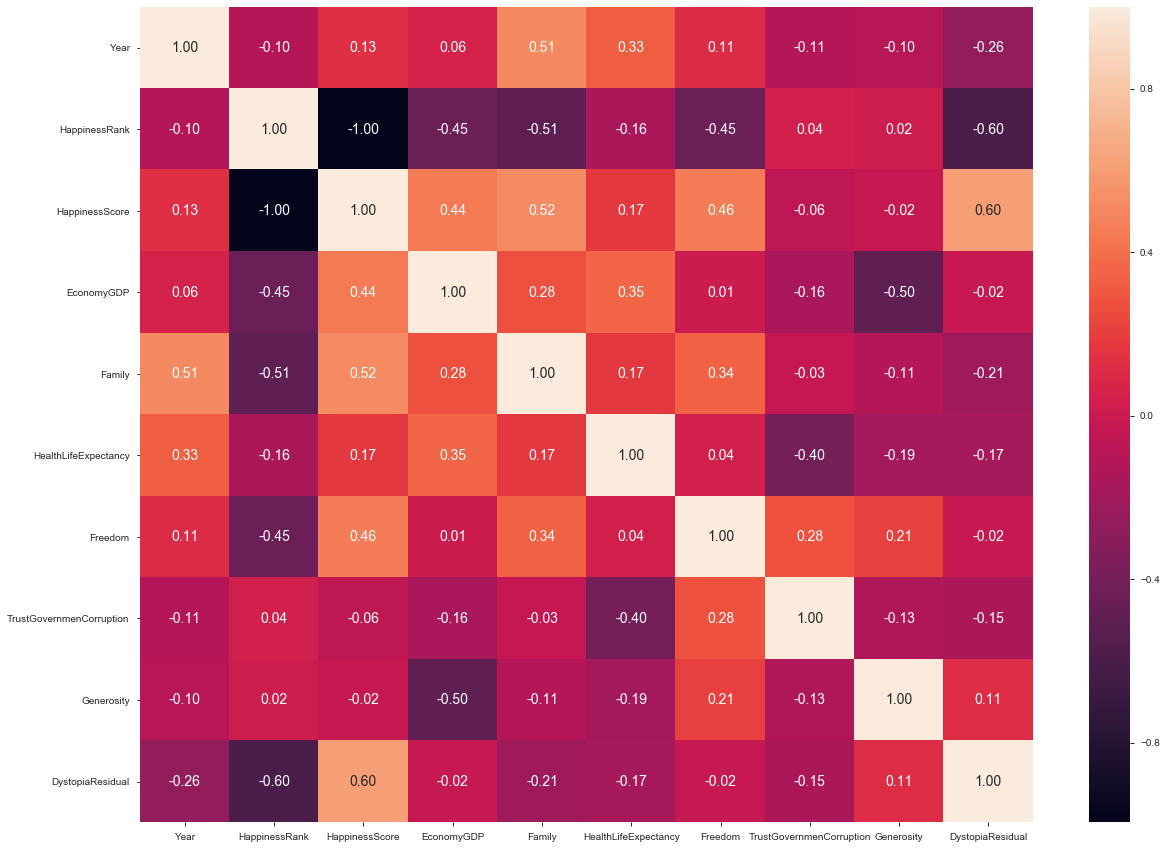

In [37]:
plt.rcParams['figure.figsize'] = (20, 15)
d = df.loc[lambda df: df['Region'] == 'Central and Eastern Europe']
sns.heatmap(d.corr(),fmt='.2f', annot=True, annot_kws={"size": 14})
plt.show()

#### Correlation for Eastern Asia

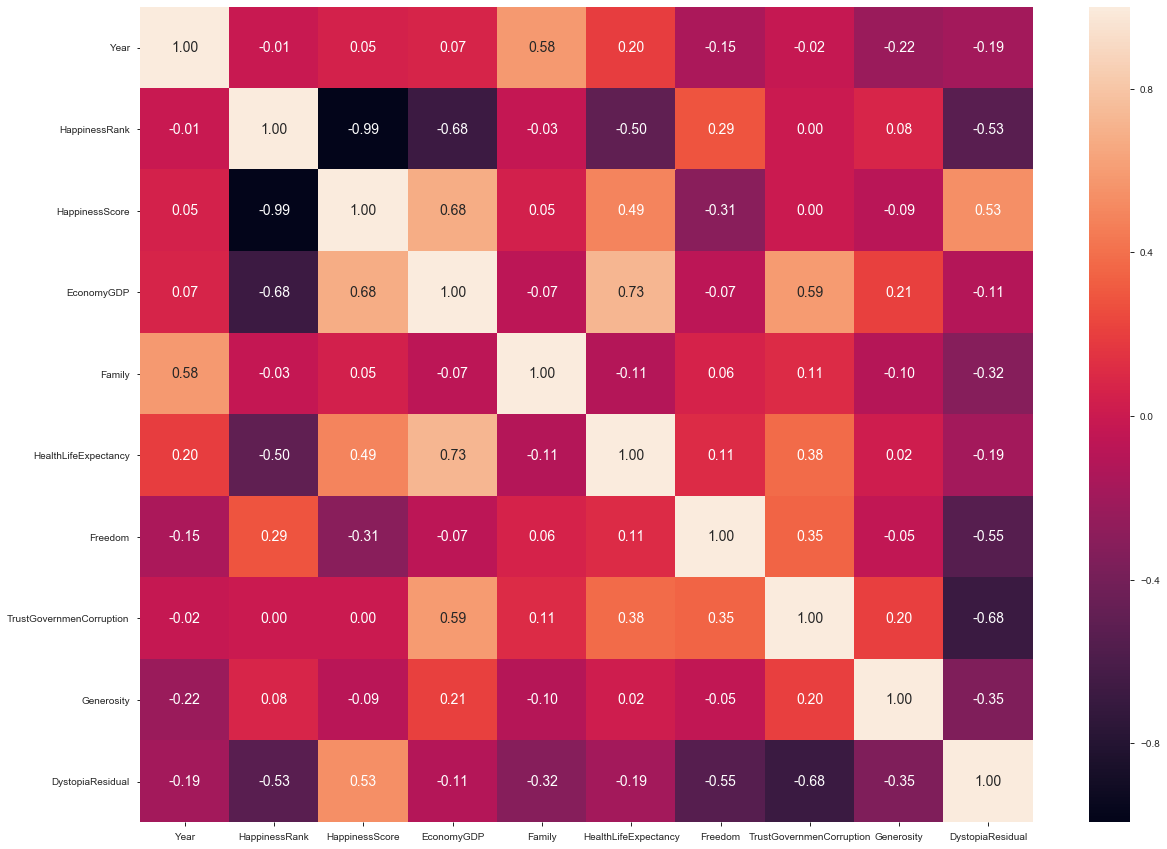

In [38]:
plt.rcParams['figure.figsize'] = (20, 15)
d = df.loc[lambda df: df['Region'] == 'Eastern Asia']
sns.heatmap(d.corr(),fmt='.2f', annot=True, annot_kws={"size": 14})
plt.show()

#### Correlation for Sub-Saharan Africa

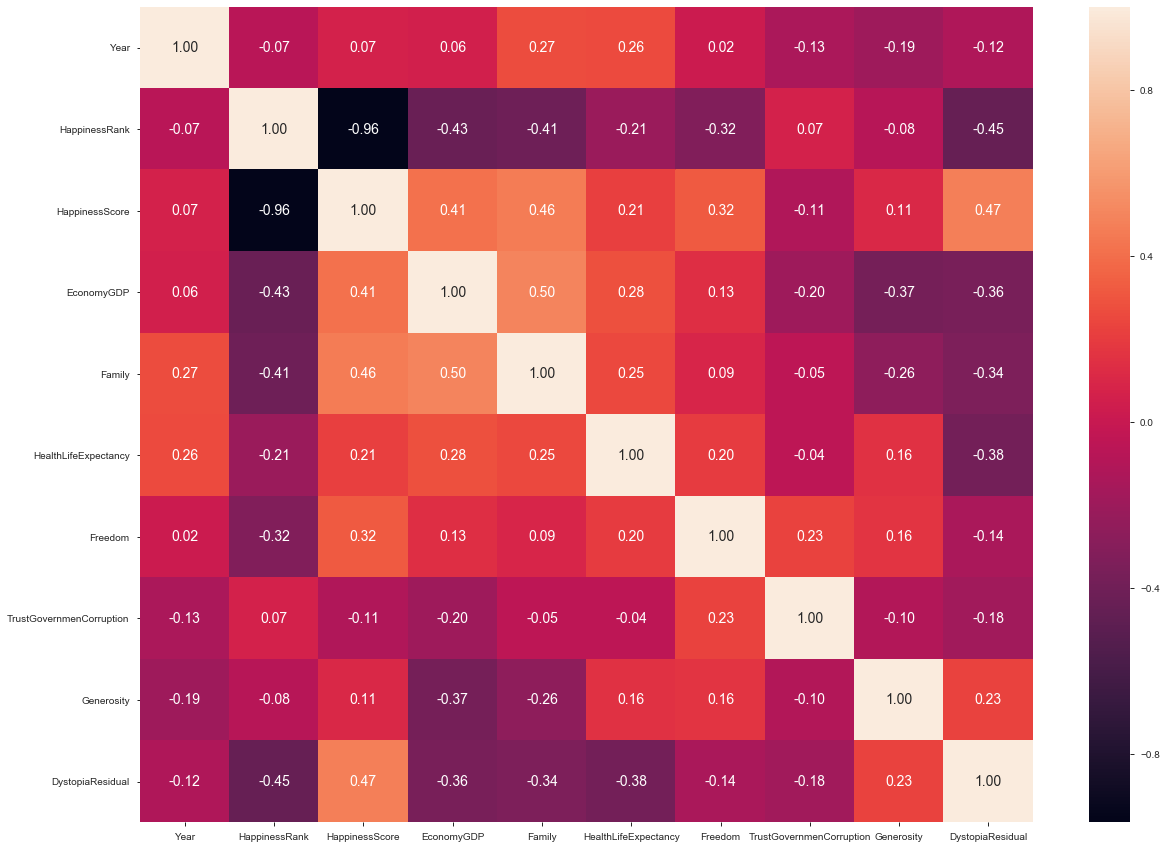

In [39]:
plt.rcParams['figure.figsize'] = (20, 15)
d = df.loc[lambda df: df['Region'] == 'Sub-Saharan Africa']
sns.heatmap(d.corr(),fmt='.2f', annot=True, annot_kws={"size": 14})
plt.show()

Sub-Saharan Africa is one of the most unhappiest region in the world. 

#### Correlation for Southern Asia

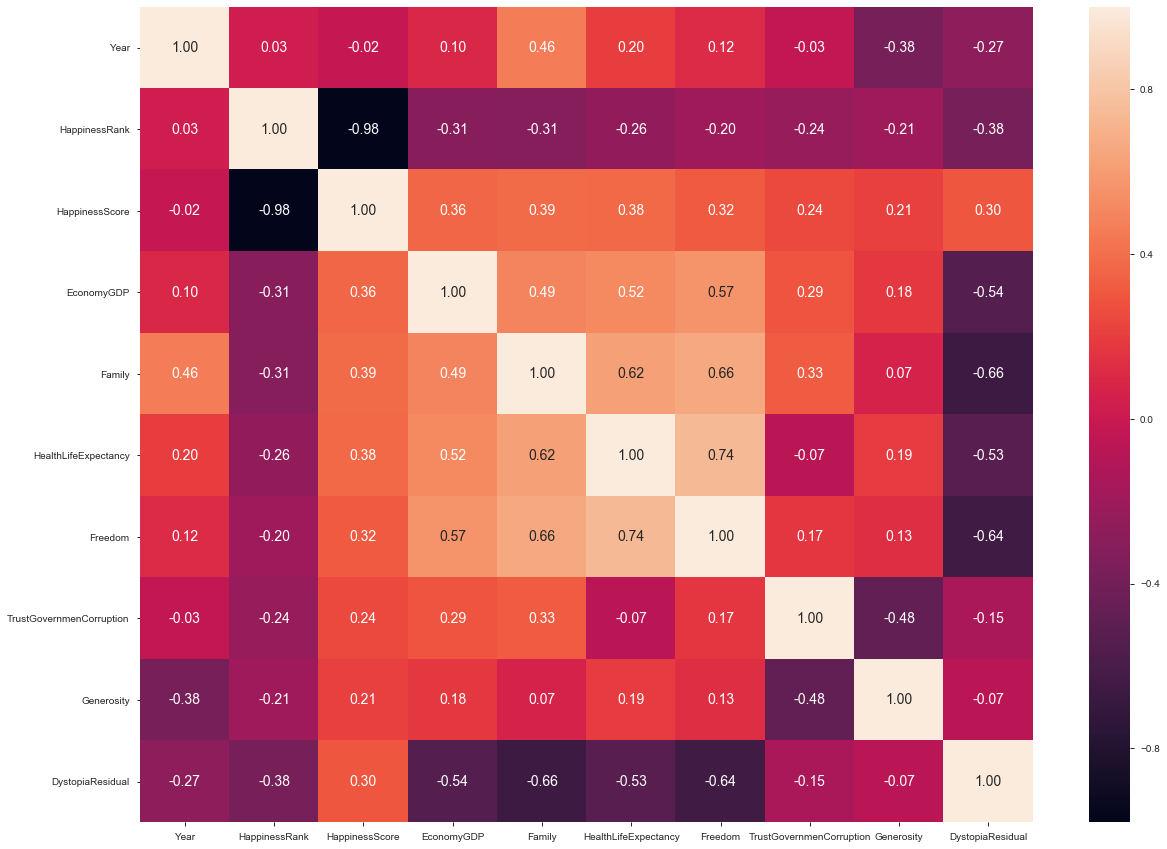

In [40]:
plt.rcParams['figure.figsize'] = (20, 15)
d = df.loc[lambda df: df['Region'] == 'Southern Asia']
sns.heatmap(d.corr(),fmt='.2f', annot=True, annot_kws={"size": 14})
plt.show()

## Stack barchart

With the stack barchart we can see the role of the feature for the happiness Score. 

### Stack barchart of Top 10 Countries

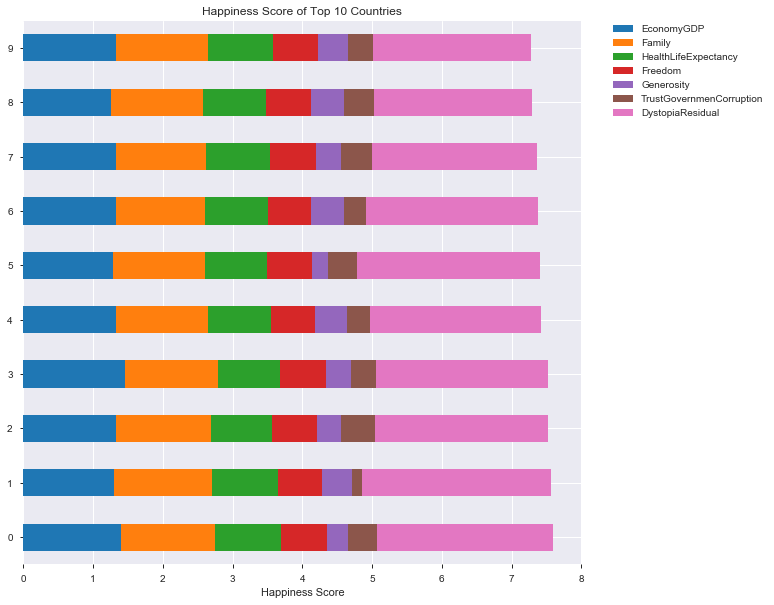

In [41]:
df[['EconomyGDP', 'Family','HealthLifeExpectancy', 'Freedom', 'Generosity', 'TrustGovernmenCorruption', 'DystopiaResidual']].head(10).plot(kind='barh',xticks=np.arange(9), stacked=True, figsize= (10, 10))
plt.xlabel("Happiness Score")
plt.title('Happiness Score of Top 10 Countries')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### Stack barchart of Bottom 10 Countries

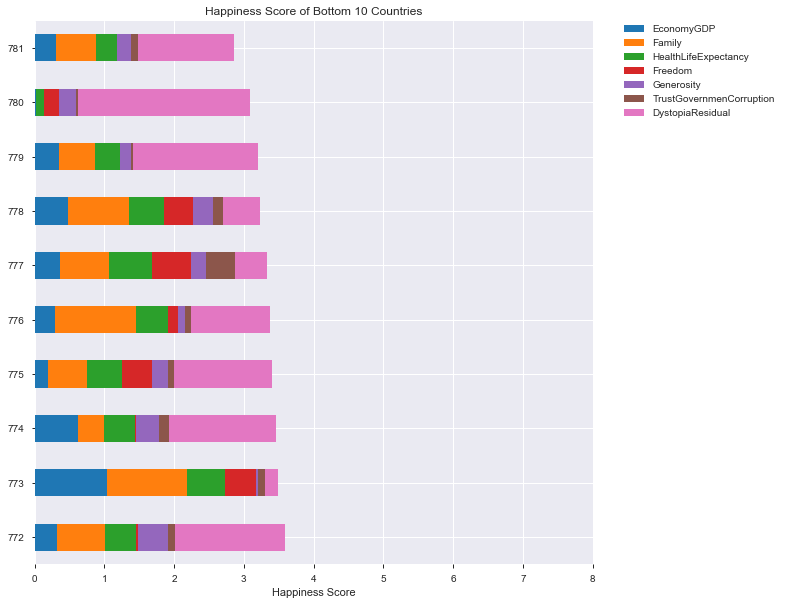

In [42]:
df[['EconomyGDP', 'Family','HealthLifeExpectancy', 'Freedom', 'Generosity', 'TrustGovernmenCorruption', 'DystopiaResidual']].tail(10).plot(kind='barh',xticks=np.arange(9), stacked=True, figsize= (10, 10))
plt.xlabel("Happiness Score")
plt.title('Happiness Score of Bottom 10 Countries')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### Histogramm of Happiness Score for all years

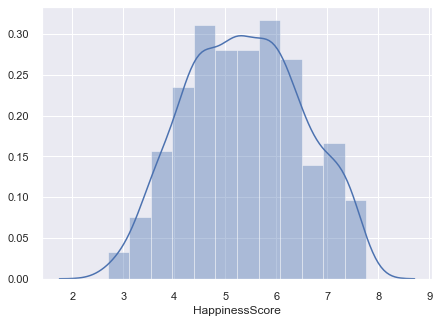

In [43]:
fig = plt.figure(figsize=(7,5))
sns.set()
sns.distplot(df['HappinessScore'],bins=12);

The distribution tails aren't equal. There are more happy people than unhappy people in the world. We also see a bimodal distribution.

## Linear Regression

### Linear Regression for 'HappinessScore~EconomyGDP':

Populating the interactive namespace from numpy and matplotlib


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         HappinessScore   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     1289.
Date:                Sat, 01 Feb 2020   Prob (F-statistic):          2.18e-167
Time:                        14:59:30   Log-Likelihood:                -821.51
No. Observations:                 782   AIC:                             1647.
Df Residuals:                     780   BIC:                             1656.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3778      0.061     55.373      0.000       3.258       3.498
EconomyGDP     2.1847      0.061     35.901      0.000       2.065       2.304
==============================================================================
Omnibus:                        3.495   Durbin-Watson:                   1.243
Prob(Omnibus):                  0.174   Jarque-Bera (JB):                2.859
Skew:                          -0.025   Prob(JB):                        0.239
Kurtosis:                       2.708   Cond. No.                         4.71
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

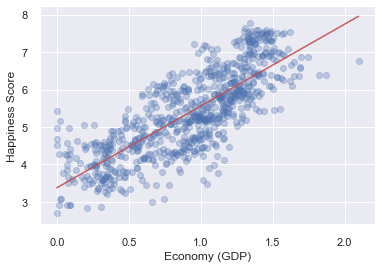

In [44]:
#import numpy as np
#import pandas as pd

#import statsmodels.api as sm
#import statsmodels.formula.api as smf


y=df['HappinessScore']
x=df['EconomyGDP']
x=sm.add_constant(x) #Adds a constant term
x.head()

est=sm.OLS(y,x)
est=est.fit()
est.summary()

est.params

%pylab inline

#picks 100 points equally from min to max
x_prime=np.linspace(x['EconomyGDP'].min(), x['EconomyGDP'].max(),100)[:, np.newaxis]
x_prime=sm.add_constant(x_prime) #add constant

#calculates the predicted values
y_hat=est.predict(x_prime)

plt.scatter(x['EconomyGDP'],y,alpha=0.3) #plots the raw data
plt.xlabel("Economy (GDP)")
plt.ylabel("Happiness Score")
plt.plot(x_prime[:,1],y_hat,'r',alpha=0.9) #Adds the regression colored in red

#formula: response ~ predictors
est=smf.ols(formula='HappinessScore~EconomyGDP',data=df).fit()
est.summary()

### Linear Regression for 'HappinessScore~HealthLifeExpectancy':

Populating the interactive namespace from numpy and matplotlib


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         HappinessScore   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     958.1
Date:                Sat, 01 Feb 2020   Prob (F-statistic):          7.50e-138
Time:                        14:59:31   Log-Likelihood:                -889.64
No. Observations:                 782   AIC:                             1783.
Df Residuals:                     780   BIC:                             1793.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                3.3145      0.072     46.057      0.000       3.173       3.456
HealthLifeExpectancy     3.3710      0.109     30.953      0.000       3.157       3.585
==============================================================================
Omnibus:                       12.782   Durbin-Watson:                   0.953
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                8.912
Skew:                          -0.135   Prob(JB):                       0.0116
Kurtosis:                       2.552   Cond. No.                         5.61
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

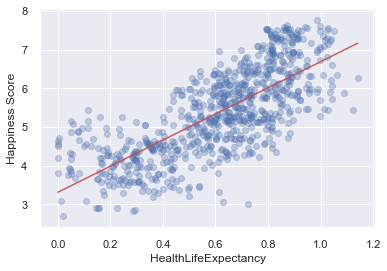

In [45]:
#import numpy as np
#import pandas as pd

#import statsmodels.api as sm
#import statsmodels.formula.api as smf


y=df['HappinessScore']
x=df['HealthLifeExpectancy']
x=sm.add_constant(x) #Adds a constant term
x.head()

est=sm.OLS(y,x)
est=est.fit()
est.summary()

est.params

%pylab inline

#picks 100 points equally from min to max
x_prime=np.linspace(x['HealthLifeExpectancy'].min(), x['HealthLifeExpectancy'].max(),100)[:, np.newaxis]
x_prime=sm.add_constant(x_prime) #add constant

#calculates the predicted values
y_hat=est.predict(x_prime)

plt.scatter(x['HealthLifeExpectancy'],y,alpha=0.3) #plots the raw data
plt.xlabel("HealthLifeExpectancy")
plt.ylabel("Happiness Score")
plt.plot(x_prime[:,1],y_hat,'r',alpha=0.9) #Adds the regression colored in red

#formula: response ~ predictors
est=smf.ols(formula='HappinessScore~HealthLifeExpectancy',data=df).fit()
est.summary()

### Linear Regression for 'HappinessScore~Family':

Populating the interactive namespace from numpy and matplotlib


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         HappinessScore   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     567.0
Date:                Sat, 01 Feb 2020   Prob (F-statistic):           1.28e-94
Time:                        14:59:31   Log-Likelihood:                -989.30
No. Observations:                 782   AIC:                             1983.
Df Residuals:                     780   BIC:                             1992.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9853      0.105     28.402      0.000       2.779       3.192
Family         2.2197      0.093     23.812      0.000       2.037       2.403
==============================================================================
Omnibus:                        9.021   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                6.444
Skew:                           0.092   Prob(JB):                       0.0399
Kurtosis:                       2.595   Cond. No.                         6.75
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

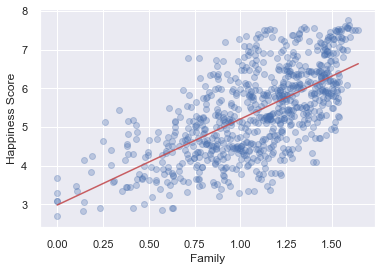

In [46]:
#import numpy as np
#import pandas as pd

#import statsmodels.api as sm
#import statsmodels.formula.api as smf


y=df['HappinessScore']
x=df['Family']
x=sm.add_constant(x) #Adds a constant term
x.head()

est=sm.OLS(y,x)
est=est.fit()
est.summary()

est.params

%pylab inline

#picks 100 points equally from min to max
x_prime=np.linspace(x['Family'].min(), x['Family'].max(),100)[:, np.newaxis]
x_prime=sm.add_constant(x_prime) #add constant

#calculates the predicted values
y_hat=est.predict(x_prime)

plt.scatter(x['Family'],y,alpha=0.3) #plots the raw data
plt.xlabel("Family")
plt.ylabel("Happiness Score")
plt.plot(x_prime[:,1],y_hat,'r',alpha=0.9) #Adds the regression colored in red

#formula: response ~ predictors
est=smf.ols(formula='HappinessScore~Family',data=df).fit()
est.summary()

### Linear Regression for 'HealthLifeExpectancy~EconomyGDP':

We saw in the first headmap that there is a high correlation between Health Life Expectancy and Economy.

Populating the interactive namespace from numpy and matplotlib


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     HealthLifeExpectancy   R-squared:                       0.615
Model:                              OLS   Adj. R-squared:                  0.615
Method:                   Least Squares   F-statistic:                     1247.
Date:                  Sat, 01 Feb 2020   Prob (F-statistic):          6.39e-164
Time:                          14:59:31   Log-Likelihood:                 353.68
No. Observations:                   782   AIC:                            -703.4
Df Residuals:                       780   BIC:                            -694.0
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1744      0.014     12.851      0.000       0.148       0.201
EconomyGDP     0.4781      0.014     35.313      0.000       0.452       0.505
==============================================================================
Omnibus:                       65.875   Durbin-Watson:                   1.430
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.002
Skew:                          -0.696   Prob(JB):                     3.48e-19
Kurtosis:                       3.820   Cond. No.                         4.71
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

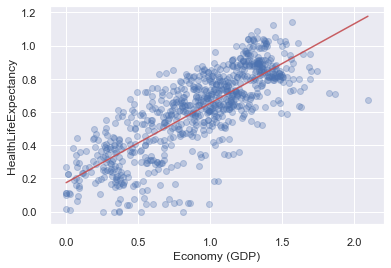

In [47]:
#import numpy as np
#import pandas as pd

#import statsmodels.api as sm
#import statsmodels.formula.api as smf


y=df['HealthLifeExpectancy']
x=df['EconomyGDP']
x=sm.add_constant(x) #Adds a constant term
x.head()

est=sm.OLS(y,x)
est=est.fit()
est.summary()

est.params

%pylab inline

#picks 100 points equally from min to max
x_prime=np.linspace(x['EconomyGDP'].min(), x['EconomyGDP'].max(),100)[:, np.newaxis]
x_prime=sm.add_constant(x_prime) #add constant

#calculates the predicted values
y_hat=est.predict(x_prime)

plt.scatter(x['EconomyGDP'],y,alpha=0.3) #plots the raw data
plt.xlabel("Economy (GDP)")
plt.ylabel("HealthLifeExpectancy")
plt.plot(x_prime[:,1],y_hat,'r',alpha=0.9) #Adds the regression colored in red

#formula: response ~ predictors
est=smf.ols(formula='HealthLifeExpectancy~EconomyGDP',data=df).fit()
est.summary()

# World Happiness Ranking 2019

In the following we only consider the year 2019.

In [48]:
#df2019 = df[df.Year == 2019]
#del df2019['Year']
df2019.head(10)

Country                     Region  HappinessRank  HappinessScore  \
626      Finland             Western Europe              1          7.7689   
627      Denmark             Western Europe              2          7.6001   
628       Norway             Western Europe              3          7.5539   
629      Iceland             Western Europe              4          7.4936   
630  Netherlands             Western Europe              5          7.4876   
631  Switzerland             Western Europe              6          7.4802   
632       Sweden             Western Europe              7          7.3433   
633  New Zealand  Australia and New Zealand              8          7.3075   
634       Canada              North America              9          7.2781   
635      Austria             Western Europe             10          7.2460   

     EconomyGDP    Family  HealthLifeExpectancy   Freedom  \
626    1.340243  1.587276              0.986145  0.595895   
627    1.383439  1.572595              0.996019  0.592356   
628    1.487767  1.581548              1.028123  0.603500   
629    1.380163  1.623651              1.025653  0.590905   
630    1.396020  1.521903              0.999314  0.557075   
631    1.452245  1.526279              1.051989  0.571514   
632    1.386577  1.487307              1.009203  0.574420   
633    1.302586  1.557234              1.025635  0.585146   
634    1.364896  1.504741              1.038812  0.583952   
635    1.375542  1.475222              1.015777  0.532075   

     TrustGovernmenCorruption  Generosity  DystopiaResidual  
626                  0.392913    0.152708          2.713678  
627                  0.410473    0.252320          2.392891  
628                  0.340884    0.271304          2.240764  
629                  0.117980    0.354356          2.400876  
630                  0.297978    0.322440          2.392895  
631                  0.342616    0.263464          2.272114  
632                  0.373202    0.267024          2.245527  
633                  0.380281    0.329843          2.126791  
634                  0.308038    0.285020          2.192688  
635                  0.226221    0.243567          2.377548

## Pandas Profiling

In [49]:
pandas_profiling.ProfileReport(df2019)

### Pair-Wise Scatter Plot for 2019:

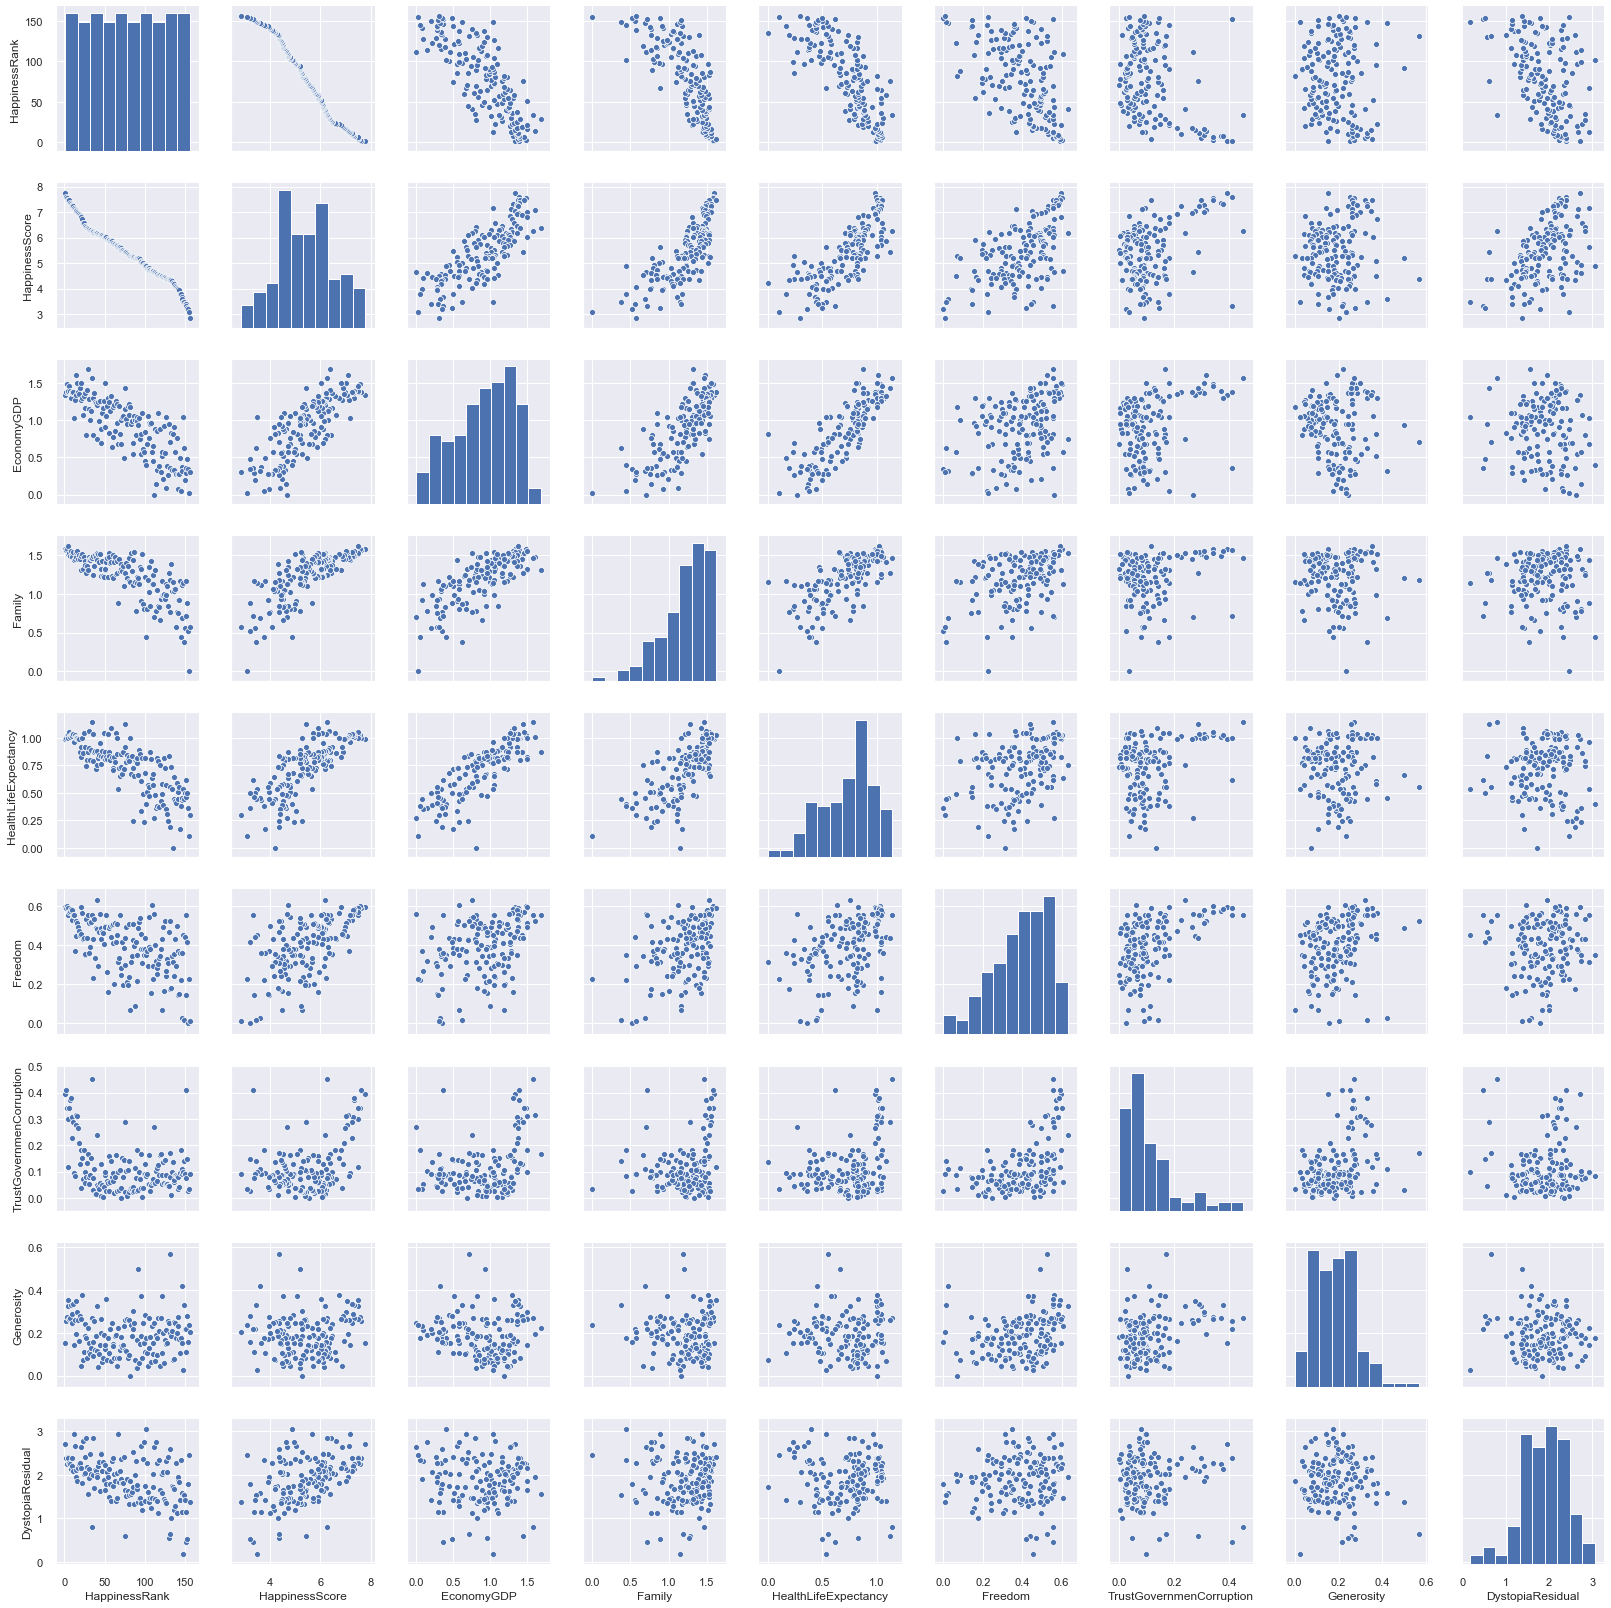

In [50]:
#import seaborn as sns

sns.pairplot(df2019)
plt.show()

### Scatter Plot with linear regression models

Text(0.5, 0.98, 'World Happiness Report 2019 - Attributes Pairwise Plots')

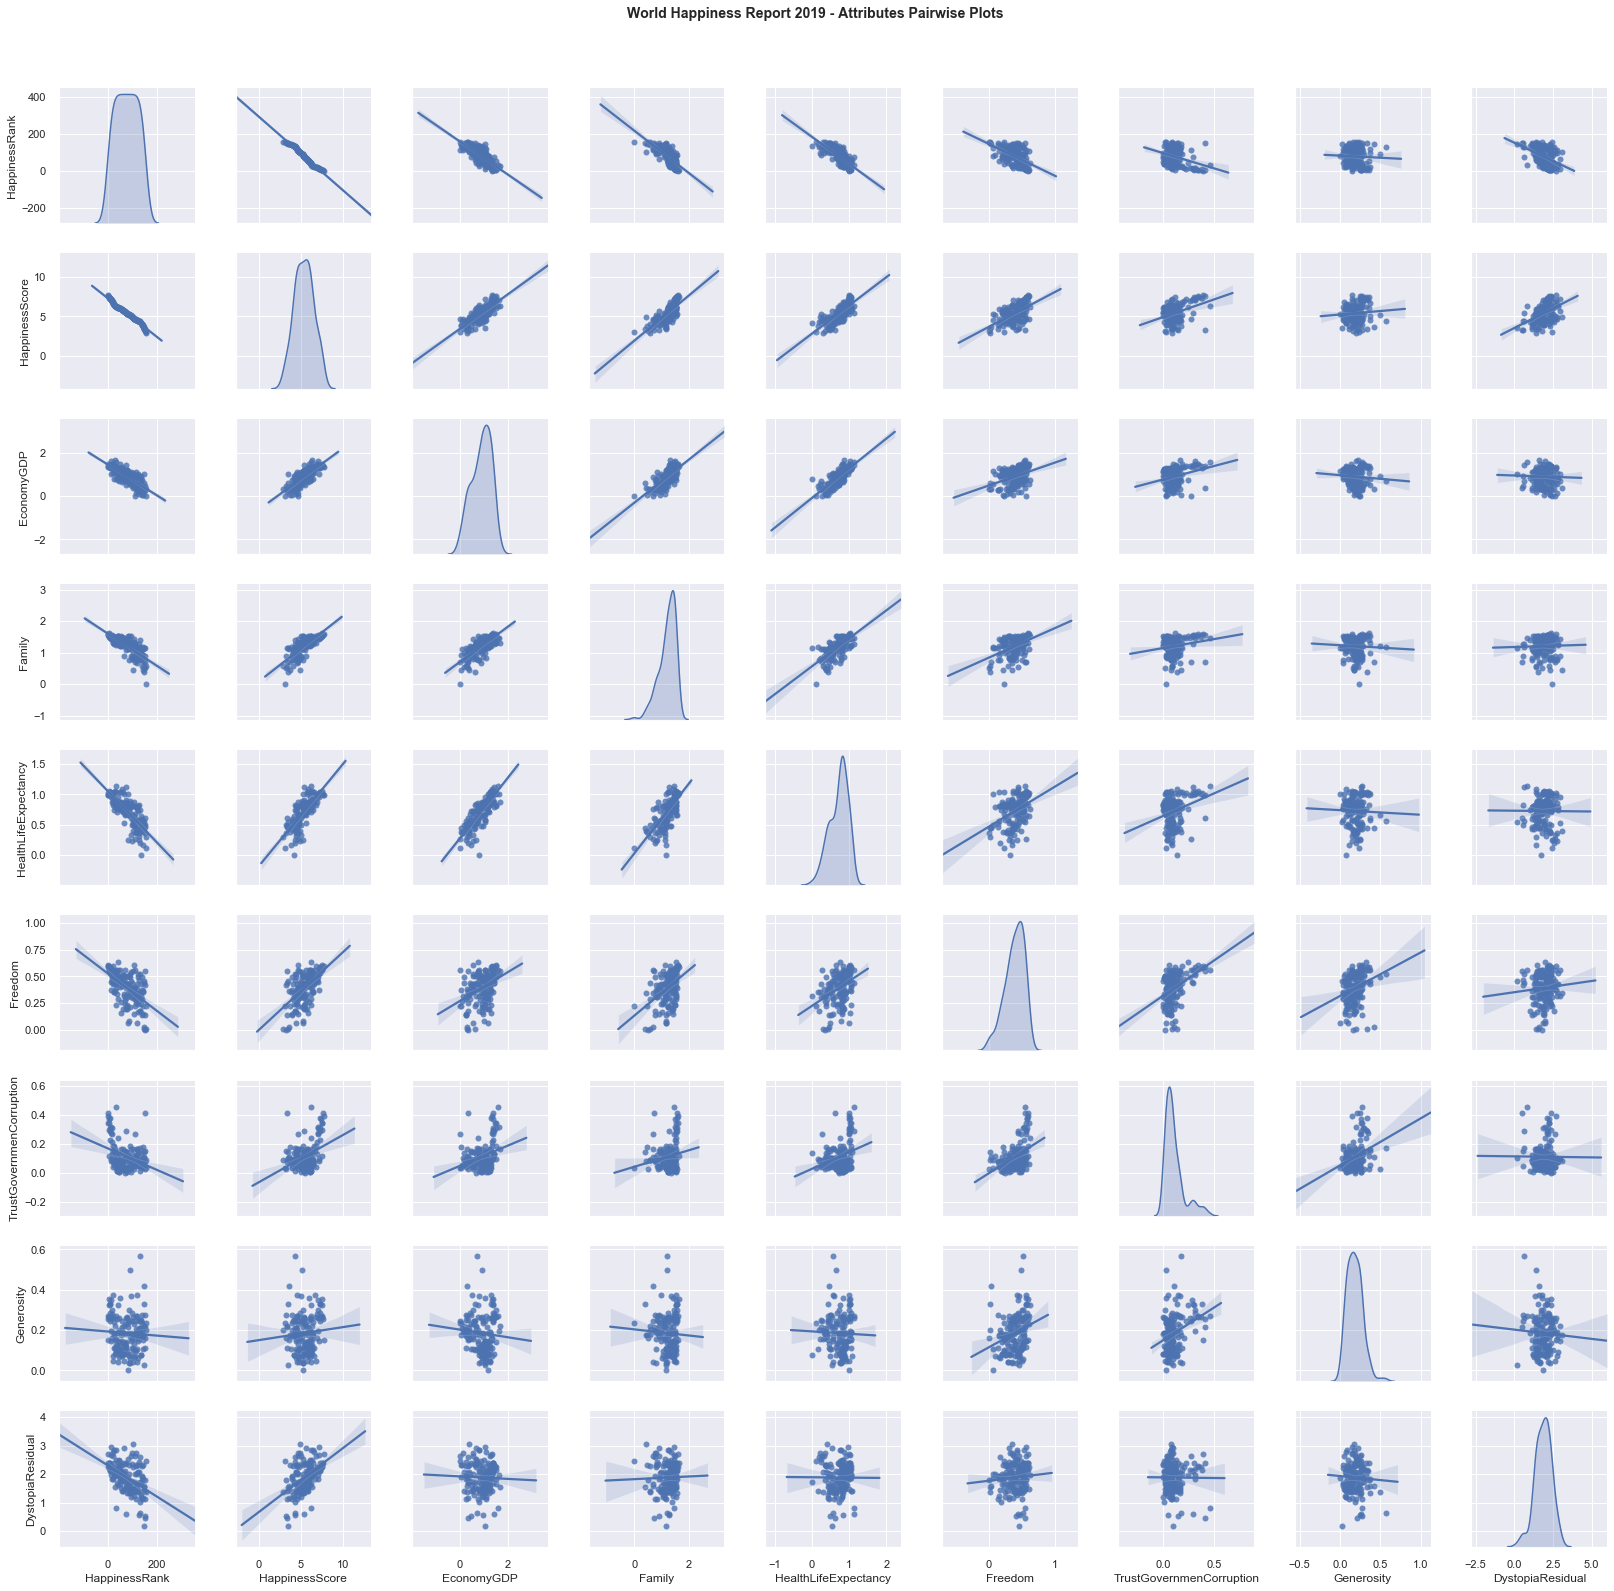

In [51]:
pp = sns.pairplot(df2019, diag_kws=dict(shade=True), diag_kind="kde", kind="reg")
    

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
fig.suptitle('World Happiness Report 2019 - Attributes Pairwise Plots', fontsize=14, fontweight='bold')

### Happiness Score vs. contintents for 2019
Distribution of Happiness Score for all regions:

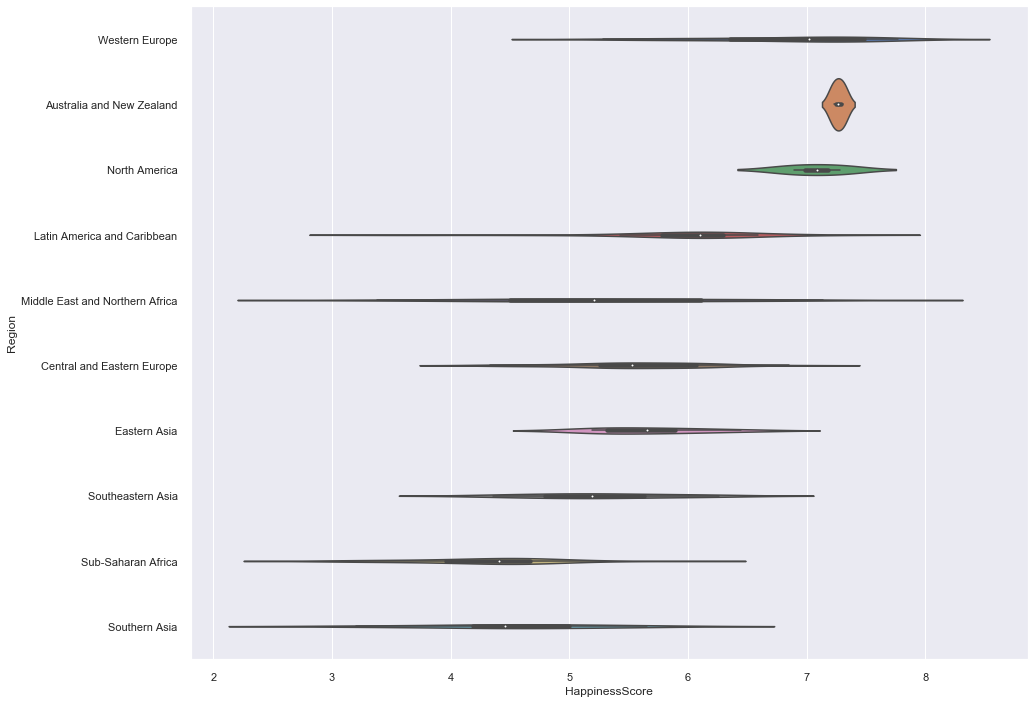

In [52]:
#import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 12)
sns.violinplot(df2019['HappinessScore'], df2019['Region'])
plt.show()

#### Boxplot

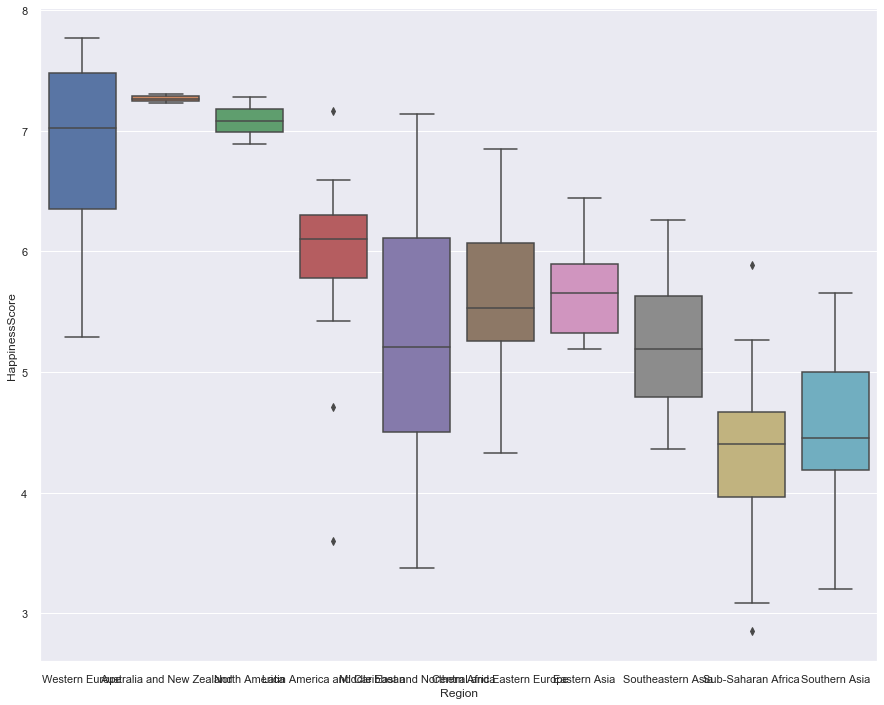

In [53]:
ax = sns.boxplot(x="Region", y="HappinessScore", data=df2019)

## Correlation Matrix for 2019
### Headmap

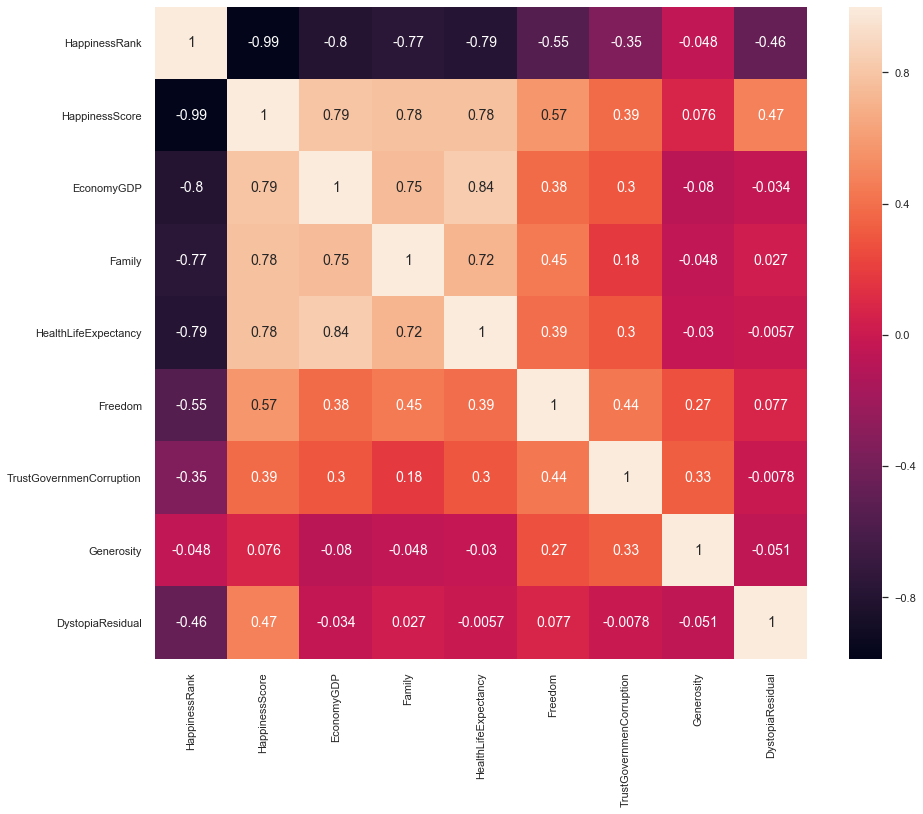

In [54]:
#import seaborn as sns
sns.heatmap(df2019.corr(), square = True, annot=True, annot_kws={"size": 14})

As we saw in the Head Map before, Happiness Score is highly correlated with EconomyGDP, Family and Health Life Expectancy and a bit related with Freedom and Dystopia Residuals. 

### Correlation divided by continent for 2019:

#### Correlation for Western Europe

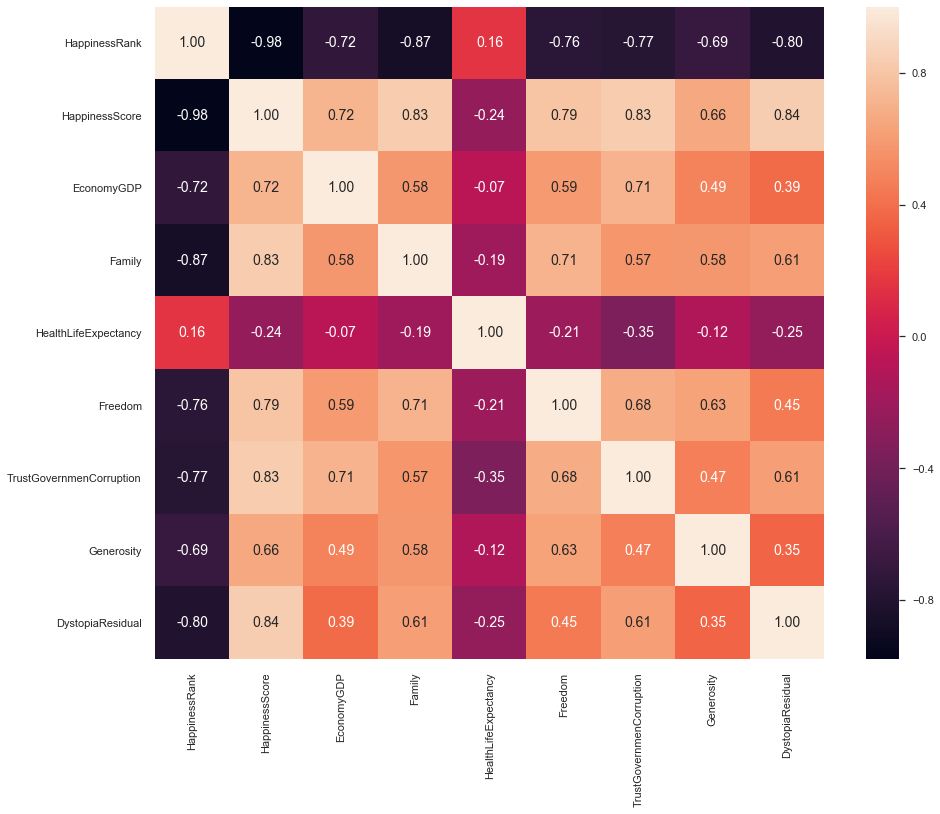

In [55]:
#plt.rcParams['figure.figsize'] = (20, 15)
d = df2019.loc[lambda df2019: df2019['Region'] == 'Western Europe']
sns.heatmap(d.corr(),fmt='.2f', annot=True, annot_kws={"size": 14})
plt.show()

Compared to the Head Map above (2019), the Happiness Score for Europe is also higly correlated with Trust and Freedom.

#### Correlation for North America

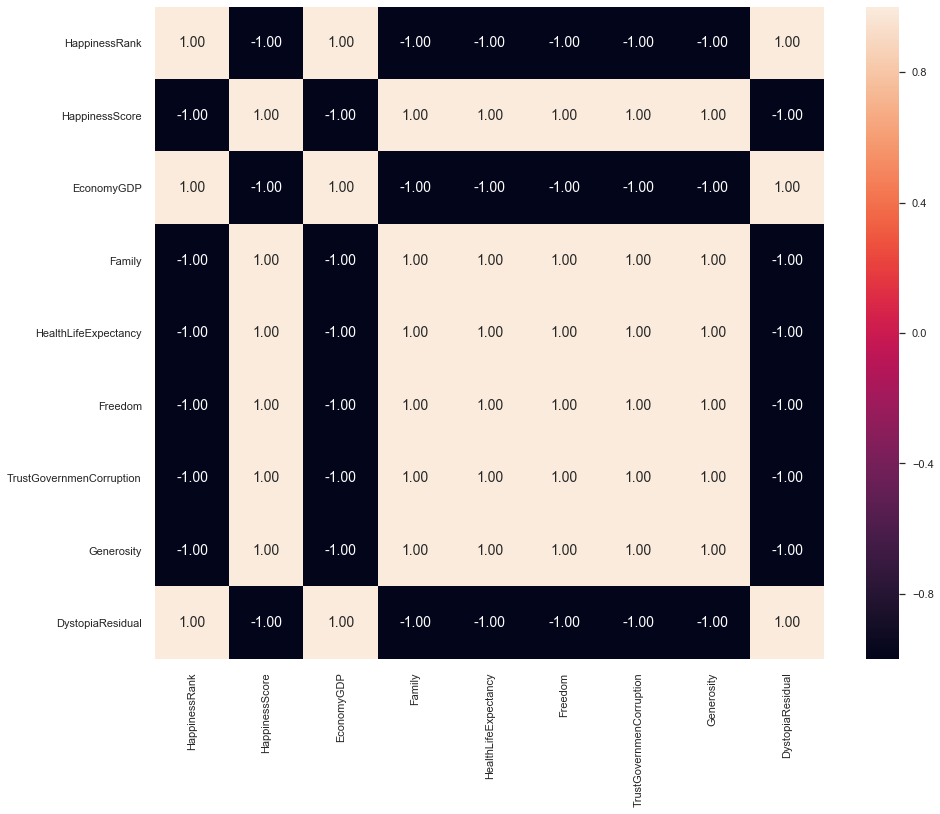

In [56]:
#plt.rcParams['figure.figsize'] = (20, 15)
d = df2019.loc[lambda df2019: df2019['Region'] == 'North America']
sns.heatmap(d.corr(),fmt='.2f', annot=True, annot_kws={"size": 14})
plt.show()

In North America everything is highly correlated to the Happiness Score. 

#### Correlation for Australia and New Zealand

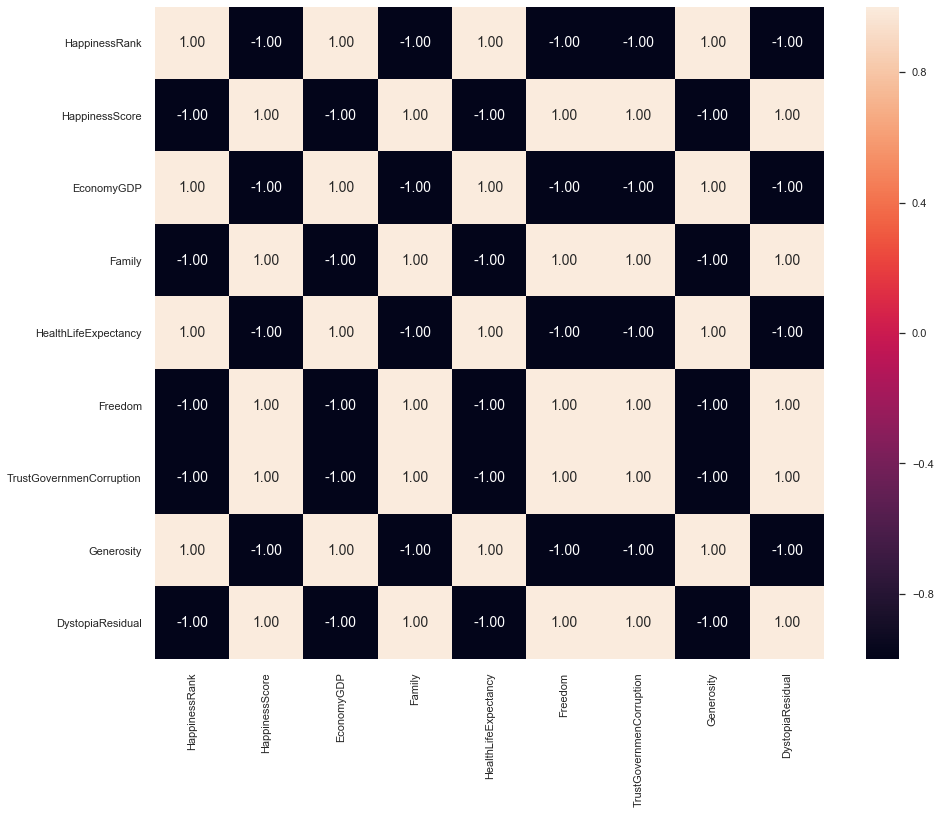

In [57]:
#plt.rcParams['figure.figsize'] = (20, 15)
d = df2019.loc[lambda df2019: df2019['Region'] == 'Australia and New Zealand']

sns.heatmap(d.corr(),fmt='.2f', annot=True, annot_kws={"size": 14})
plt.show()

# 

#### Correlation for Middle East and Northern Africa

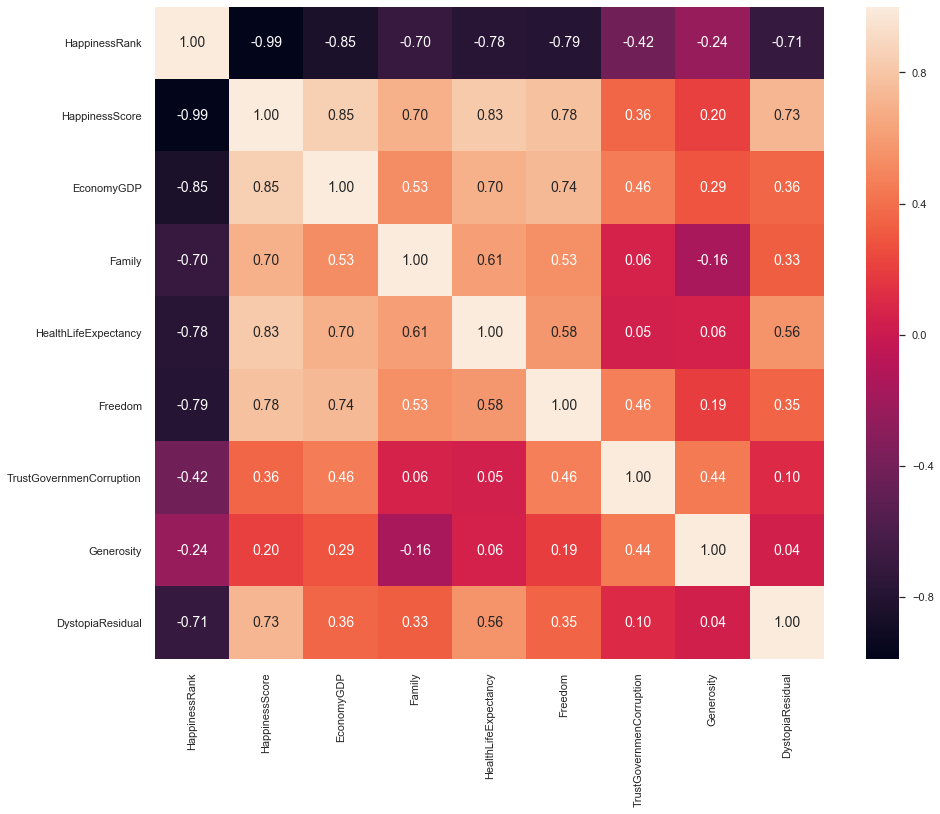

In [58]:
#plt.rcParams['figure.figsize'] = (20, 15)
d = df2019.loc[lambda df2019: df2019['Region'] == 'Middle East and Northern Africa']
sns.heatmap(d.corr(),fmt='.2f', annot=True, annot_kws={"size": 14})
#plt.show()

Happiness is highly correlated with almost all important factors such as Economy, Family and Health, as well as with Freedom and Dystopia Residual. The most important factor for this region is Economy for 2019. 

#### Correlation for Latin America and Caribbean

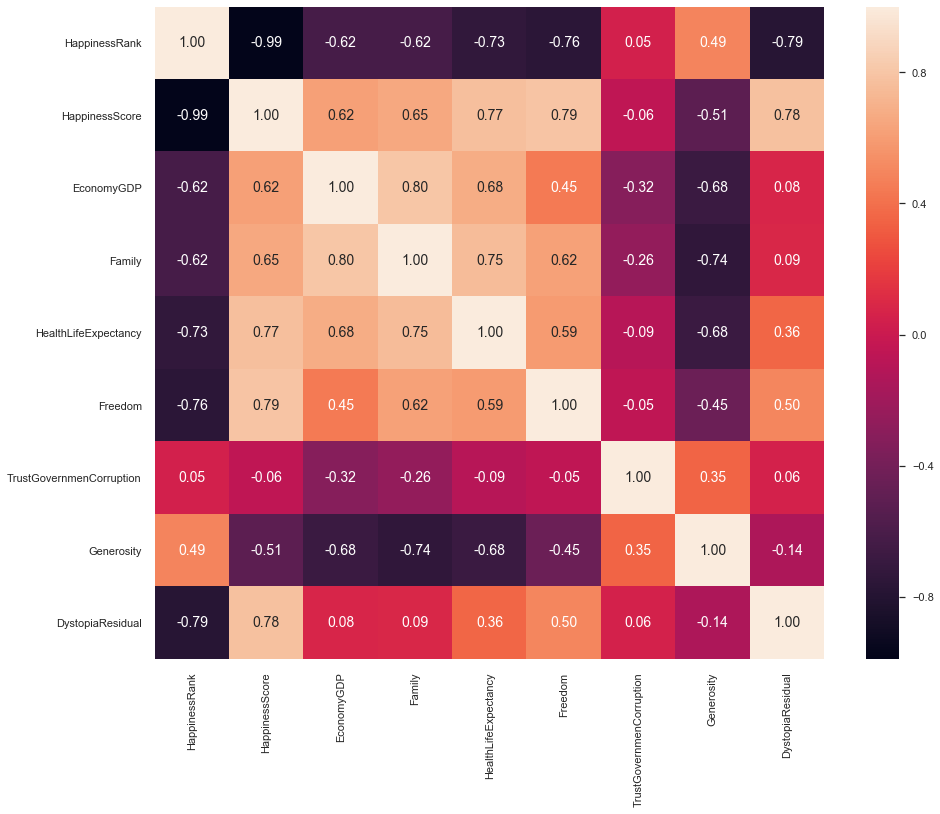

In [59]:
#plt.rcParams['figure.figsize'] = (20, 15)
d = df2019.loc[lambda df2019: df2019['Region'] == 'Latin America and Caribbean']
sns.heatmap(d.corr(),fmt='.2f', annot=True, annot_kws={"size": 14})
#plt.show()

#### Correlation for Southeastern Asia

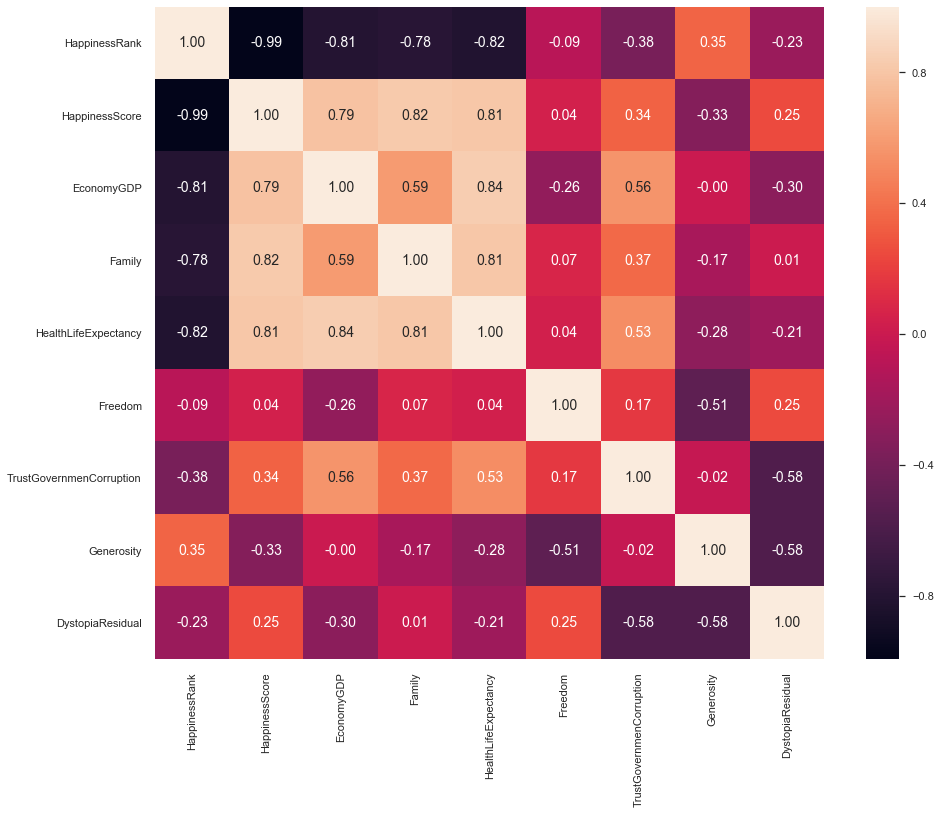

In [60]:
#plt.rcParams['figure.figsize'] = (20, 15)
d = df2019.loc[lambda df2019: df2019['Region'] == 'Southeastern Asia']
sns.heatmap(d.corr(),fmt='.2f', annot=True, annot_kws={"size": 14})
#plt.show()

Happiness is highly correlated with Economy, Family and Health. But there is a low or even a negative correlation with other important features such as Freedom, Trust and Generosity. The hightest correlation with Happiness has the feature Family. 

#### Correlation for Central and Eastern Europe

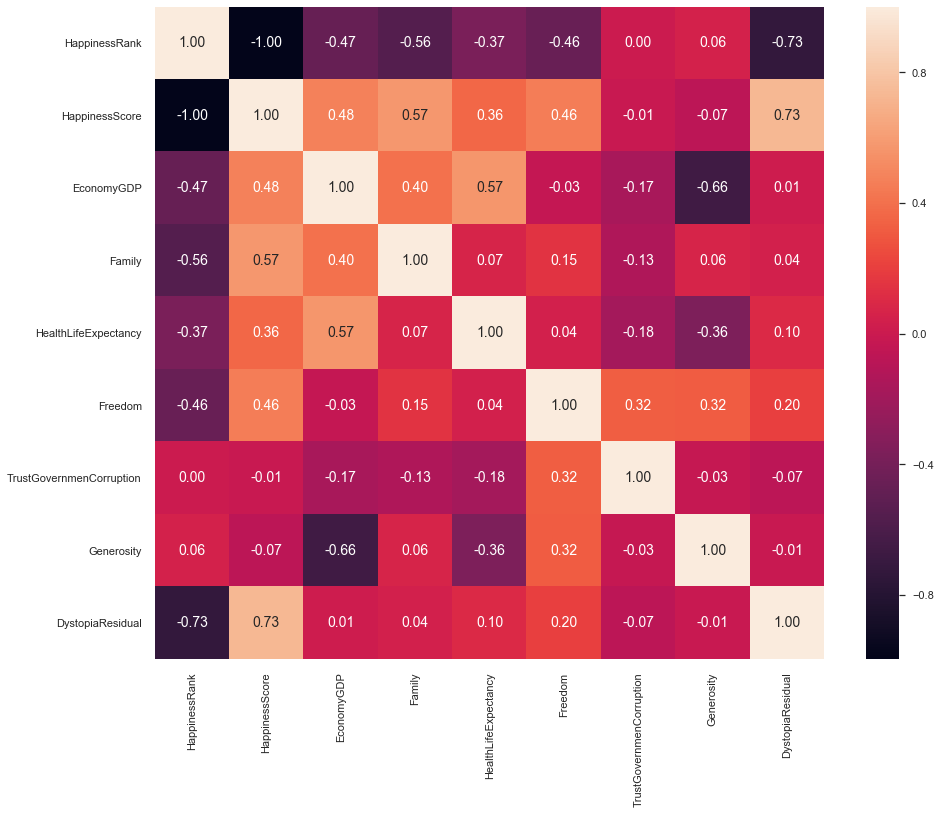

In [61]:
#plt.rcParams['figure.figsize'] = (20, 15)
d = df2019.loc[lambda df2019: df2019['Region'] == 'Central and Eastern Europe']
sns.heatmap(d.corr(),fmt='.2f', annot=True, annot_kws={"size": 14})
#plt.show()

For central and eastern Europe there is no high correlation with Happiness at all, except with Dystopia Residual.

#### Correlation for Eastern Asia

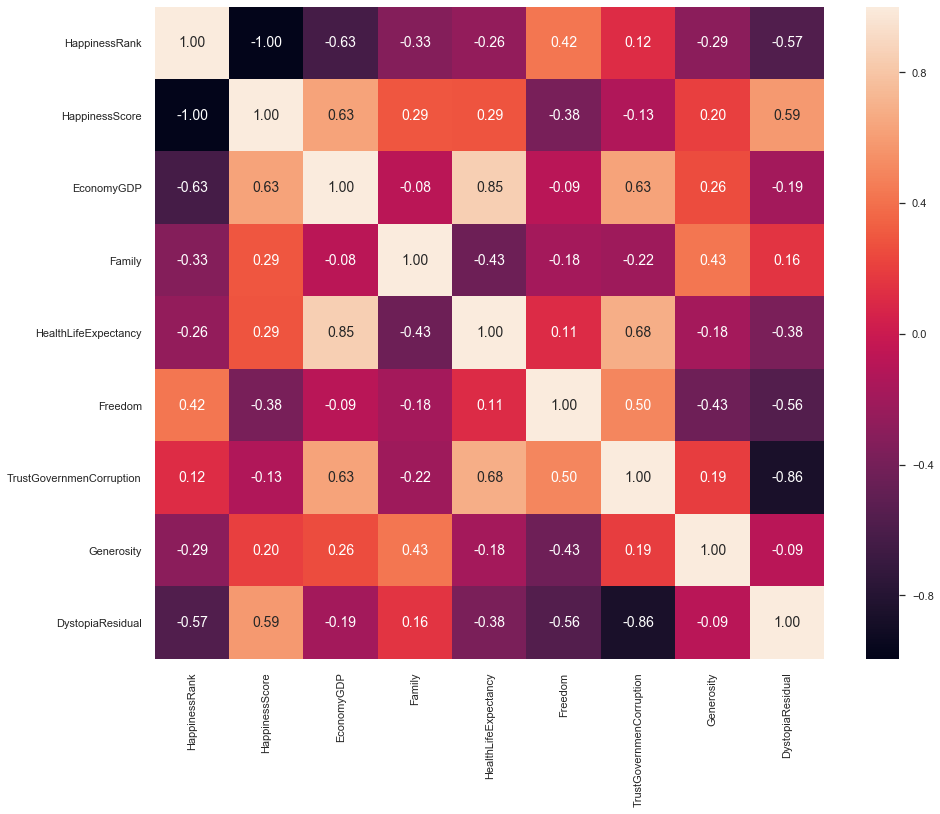

In [62]:
#plt.rcParams['figure.figsize'] = (20, 15)
d = df2019.loc[lambda df2019: df2019['Region'] == 'Eastern Asia']
sns.heatmap(d.corr(),fmt='.2f', annot=True, annot_kws={"size": 14})
#plt.show()

For Estern Asia we have a negative correlation for Freedom and Trust. Also the correlation which where strong in other regions are not highly correlated here. Happiness Score is mostly correlated with Economy and Dystopia Residuals. 

#### Correlation for Sub-Saharan Africa

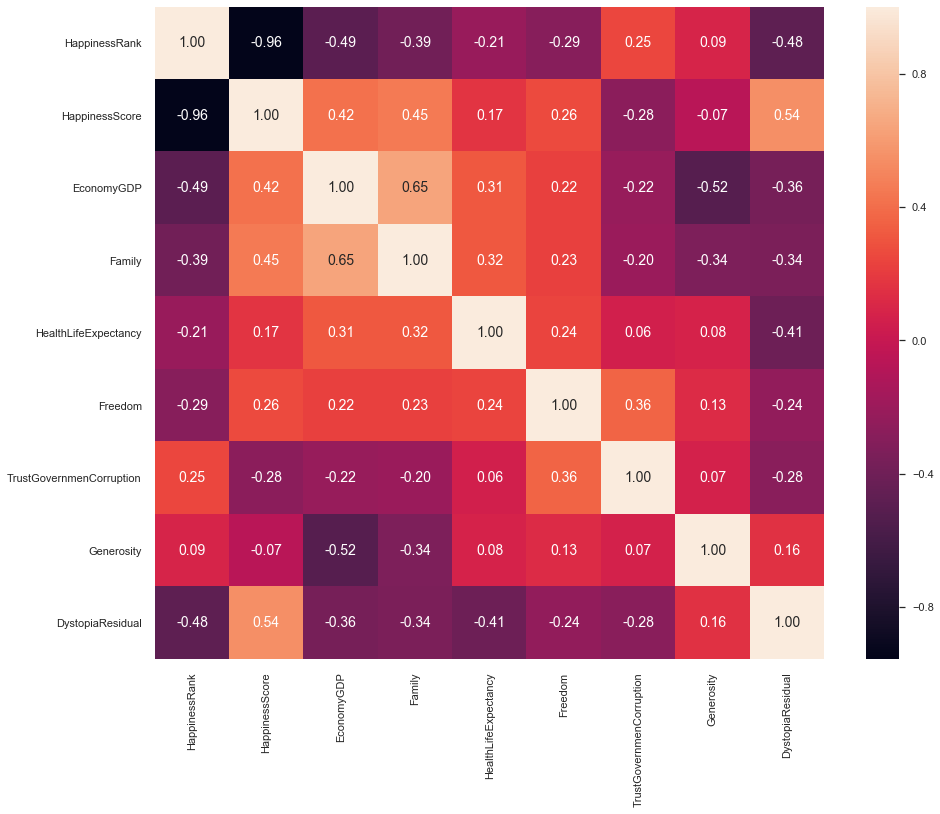

In [63]:
#plt.rcParams['figure.figsize'] = (20, 15)
d = df2019.loc[lambda df2019: df2019['Region'] == 'Sub-Saharan Africa']
sns.heatmap(d.corr(),fmt='.2f', annot=True, annot_kws={"size": 14})
#plt.show()

The correlation for Happiness with the important feature is very low or even negative. The only correlation over 0.5 is Dystopia Residual. Every other correlation here is less than 0.5 which is very bad. 

#### Correlation for Southern Asia

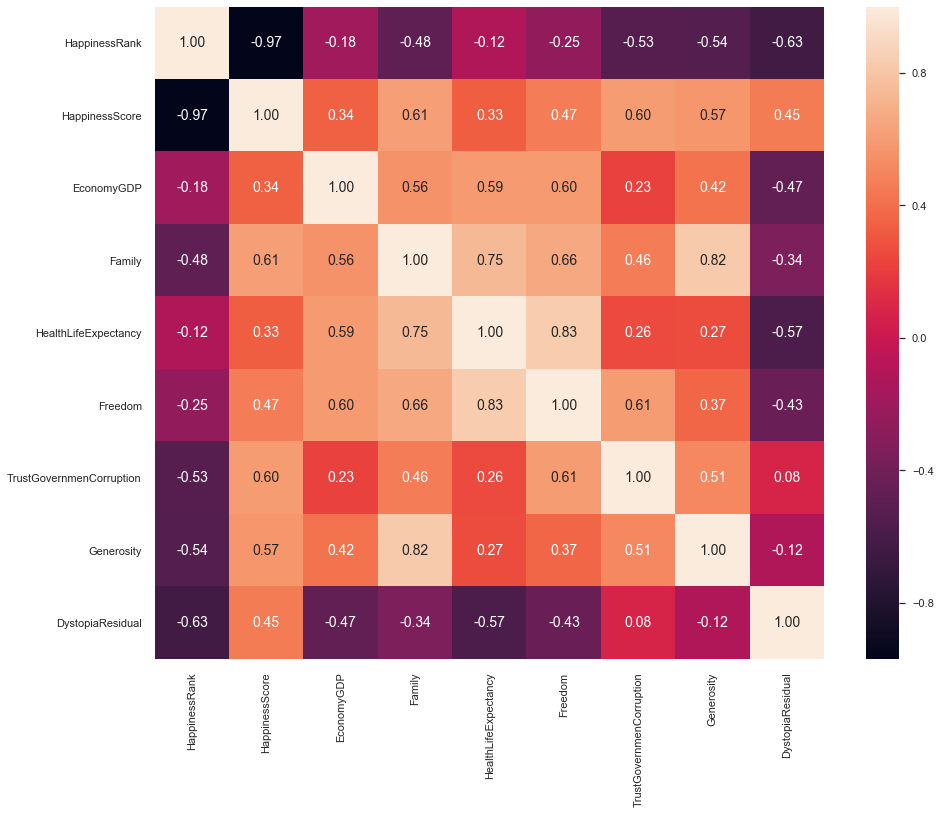

In [64]:
#plt.rcParams['figure.figsize'] = (20, 15)
d = df2019.loc[lambda df2019: df2019['Region'] == 'Southern Asia']
sns.heatmap(d.corr(),fmt='.2f', annot=True, annot_kws={"size": 14})
#plt.show()

The most important features in the southern asia region for the happiness score are Family and Trust. 

## Stack barchart

### Stack barchart for Top 10 Countries

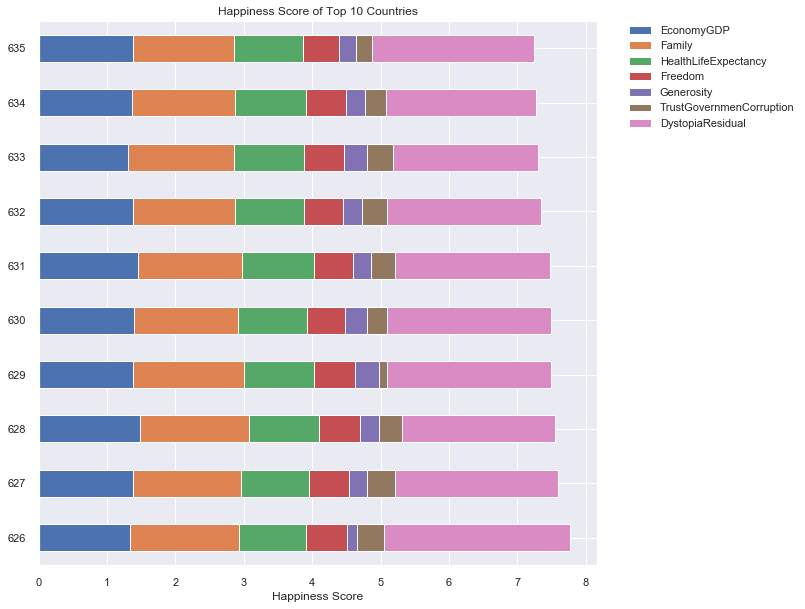

In [65]:
df2019[['EconomyGDP', 'Family','HealthLifeExpectancy', 'Freedom', 'Generosity', 'TrustGovernmenCorruption', 'DystopiaResidual']].head(10).plot(kind='barh',xticks=np.arange(9), stacked=True, figsize= (10, 10))
plt.xlabel("Happiness Score")
plt.title('Happiness Score of Top 10 Countries')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### Stack barchart for Bottom 10 Countries

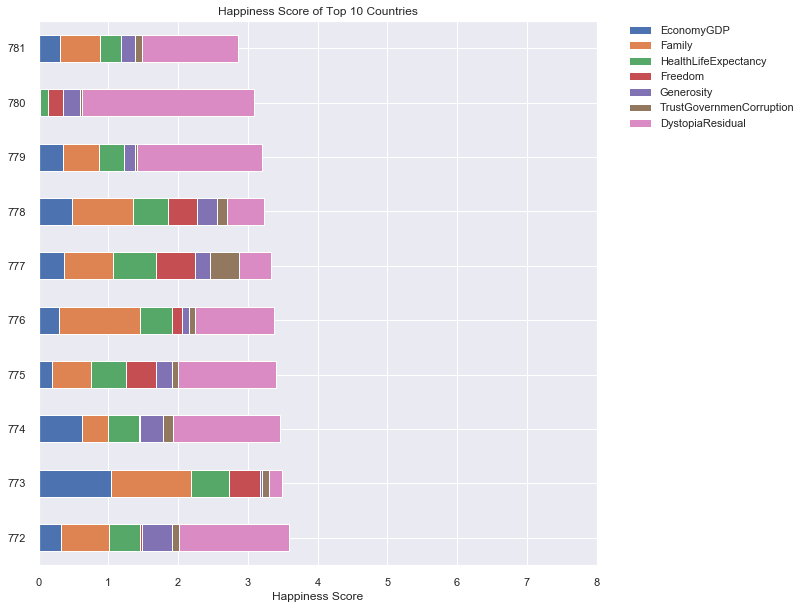

In [66]:
df2019[['EconomyGDP', 'Family','HealthLifeExpectancy', 'Freedom', 'Generosity', 'TrustGovernmenCorruption', 'DystopiaResidual']].tail(10).plot(kind='barh',xticks=np.arange(9), stacked=True, figsize= (10, 10))
plt.xlabel("Happiness Score")
plt.title('Happiness Score of Top 10 Countries')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### Scatterplot EconomyGDP~HappinessScore

In this plot, we see all countries happiness score compared to their economy. 

In [67]:
fig = px.scatter(df2019, x='HappinessScore', y='EconomyGDP', text='Country')
fig.update_traces(textposition='top center')
fig.update_layout(height=1000,)
fig.show()

### Histogramm of Happiness Score for 2019

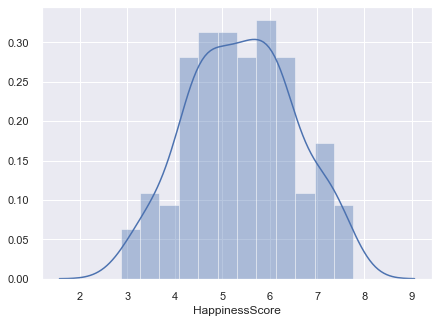

In [68]:
fig = plt.figure(figsize=(7,5))
sns.set()
sns.distplot(df2019['HappinessScore'],bins=12);

As we saw in the first histogramm, also for 2019 we have mor happy countries than unhappy countries in the world.

## Linear Regression for 2019

### Linear Regression for 'HappinessScore~EconomyGDP':

Populating the interactive namespace from numpy and matplotlib


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         HappinessScore   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     262.6
Date:                Sat, 01 Feb 2020   Prob (F-statistic):           4.23e-35
Time:                        15:01:30   Log-Likelihood:                -159.95
No. Observations:                 156   AIC:                             323.9
Df Residuals:                     154   BIC:                             330.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3991      0.135     25.120      0.000       3.132       3.666
EconomyGDP     2.2185      0.137     16.205      0.000       1.948       2.489
==============================================================================
Omnibus:                        1.141   Durbin-Watson:                   1.378
Prob(Omnibus):                  0.565   Jarque-Bera (JB):                1.246
Skew:                          -0.177   Prob(JB):                        0.536
Kurtosis:                       2.742   Cond. No.                         4.77
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

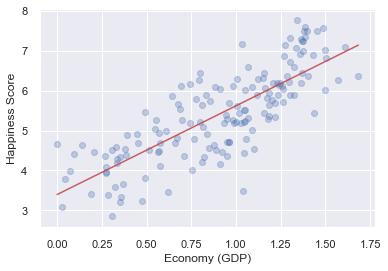

In [69]:
#import numpy as np
#import pandas as pd

#import statsmodels.api as sm
#import statsmodels.formula.api as smf


y=df2019['HappinessScore']
x=df2019['EconomyGDP']
x=sm.add_constant(x) #Adds a constant term
x.head()

est=sm.OLS(y,x)
est=est.fit()
est.summary()

est.params

%pylab inline

#picks 100 points equally from min to max
x_prime=np.linspace(x['EconomyGDP'].min(), x['EconomyGDP'].max(),100)[:, np.newaxis]
x_prime=sm.add_constant(x_prime) #add constant

#calculates the predicted values
y_hat=est.predict(x_prime)

plt.scatter(x['EconomyGDP'],y,alpha=0.3) #plots the raw data
plt.xlabel("Economy (GDP)")
plt.ylabel("Happiness Score")
plt.plot(x_prime[:,1],y_hat,'r',alpha=0.9) #Adds the regression colored in red

#formula: response ~ predictors
est=smf.ols(formula='HappinessScore~EconomyGDP',data=df2019).fit()
est.summary()

### Linear Regression for 'HappinessScore~Family':

Populating the interactive namespace from numpy and matplotlib


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         HappinessScore   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     234.7
Date:                Sat, 01 Feb 2020   Prob (F-statistic):           9.02e-33
Time:                        15:01:31   Log-Likelihood:                -165.36
No. Observations:                 156   AIC:                             334.7
Df Residuals:                     154   BIC:                             340.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9123      0.235      8.139      0.000       1.448       2.376
Family         2.8911      0.189     15.319      0.000       2.518       3.264
==============================================================================
Omnibus:                        1.538   Durbin-Watson:                   1.298
Prob(Omnibus):                  0.463   Jarque-Bera (JB):                1.607
Skew:                          -0.197   Prob(JB):                        0.448
Kurtosis:                       2.698   Cond. No.                         8.43
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

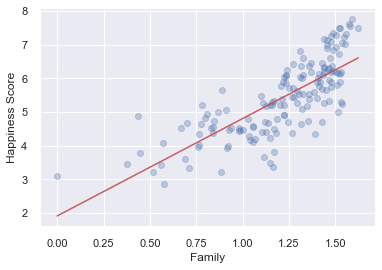

In [70]:
y=df2019['HappinessScore']
x=df2019['Family']
x=sm.add_constant(x) #Adds a constant term
x.head()

est=sm.OLS(y,x)
est=est.fit()
est.summary()

est.params

%pylab inline

#picks 100 points equally from min to max
x_prime=np.linspace(x['Family'].min(), x['Family'].max(),100)[:, np.newaxis]
x_prime=sm.add_constant(x_prime) #add constant

#calculates the predicted values
y_hat=est.predict(x_prime)

plt.scatter(x['Family'],y,alpha=0.3) #plots the raw data
plt.xlabel("Family")
plt.ylabel("Happiness Score")
plt.plot(x_prime[:,1],y_hat,'r',alpha=0.9) #Adds the regression colored in red

#formula: response ~ predictors
est=smf.ols(formula='HappinessScore~Family',data=df2019).fit()
est.summary()

### Linear Regression for 'HappinessScore~HealthLifeExpectancy':

Populating the interactive namespace from numpy and matplotlib


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         HappinessScore   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     239.0
Date:                Sat, 01 Feb 2020   Prob (F-statistic):           3.82e-33
Time:                        15:01:32   Log-Likelihood:                -164.49
No. Observations:                 156   AIC:                             333.0
Df Residuals:                     154   BIC:                             339.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                2.8070      0.177     15.838      0.000       2.457       3.157
HealthLifeExpectancy     3.5850      0.232     15.461      0.000       3.127       4.043
==============================================================================
Omnibus:                        6.329   Durbin-Watson:                   1.140
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                3.546
Skew:                          -0.149   Prob(JB):                        0.170
Kurtosis:                       2.324   Cond. No.                         6.41
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

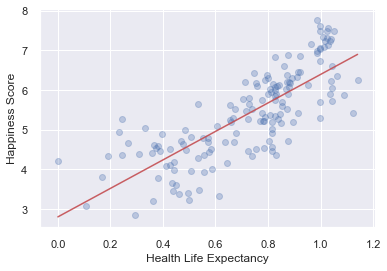

In [71]:
y=df2019['HappinessScore']
x=df2019['HealthLifeExpectancy']
x=sm.add_constant(x) #Adds a constant term
x.head()

est=sm.OLS(y,x)
est=est.fit()
est.summary()

est.params

%pylab inline

#picks 100 points equally from min to max
x_prime=np.linspace(x['HealthLifeExpectancy'].min(), x['HealthLifeExpectancy'].max(),100)[:, np.newaxis]
x_prime=sm.add_constant(x_prime) #add constant

#calculates the predicted values
y_hat=est.predict(x_prime)

plt.scatter(x['HealthLifeExpectancy'],y,alpha=0.3) #plots the raw data
plt.xlabel("Health Life Expectancy")
plt.ylabel("Happiness Score")
plt.plot(x_prime[:,1],y_hat,'r',alpha=0.9) #Adds the regression colored in red

#formula: response ~ predictors
est=smf.ols(formula='HappinessScore~HealthLifeExpectancy',data=df2019).fit()
est.summary()

### Linear Regression for 'HappinessScore~Generosity':

Populating the interactive namespace from numpy and matplotlib


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         HappinessScore   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.8913
Date:                Sat, 01 Feb 2020   Prob (F-statistic):              0.347
Time:                        15:01:33   Log-Likelihood:                -237.12
No. Observations:                 156   AIC:                             478.2
Df Residuals:                     154   BIC:                             484.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.2433      0.195     26.882      0.000       4.858       5.629
Generosity     0.8860      0.939      0.944      0.347      -0.968       2.740
==============================================================================
Omnibus:                        5.540   Durbin-Watson:                   0.014
Prob(Omnibus):                  0.063   Jarque-Bera (JB):                2.996
Skew:                          -0.067   Prob(JB):                        0.224
Kurtosis:                       2.335   Cond. No.                         10.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

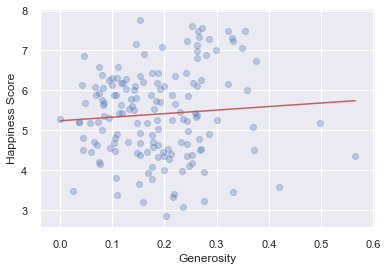

In [72]:
y=df2019['HappinessScore']
x=df2019['Generosity']
x=sm.add_constant(x) #Adds a constant term
x.head()

est=sm.OLS(y,x)
est=est.fit()
est.summary()

est.params

%pylab inline

#picks 100 points equally from min to max
x_prime=np.linspace(x['Generosity'].min(), x['Generosity'].max(),100)[:, np.newaxis]
x_prime=sm.add_constant(x_prime) #add constant

#calculates the predicted values
y_hat=est.predict(x_prime)

plt.scatter(x['Generosity'],y,alpha=0.3) #plots the raw data
plt.xlabel("Generosity")
plt.ylabel("Happiness Score")
plt.plot(x_prime[:,1],y_hat,'r',alpha=0.9) #Adds the regression colored in red

#formula: response ~ predictors
est=smf.ols(formula='HappinessScore~Generosity',data=df2019).fit()
est.summary()

## World Map

Presentation of the features on different world maps. 

In [73]:
trace1 = [go.Choropleth(
               colorscale = 'Earth',
               locationmode = 'country names',
               locations = df2019['Country'],
               text = df2019['Country'], 
               z = df2019['EconomyGDP'],
               )]

layout = dict(title = 'Economy (GDP)',
                  geo = dict(
                      showframe = True,
                      showocean = True,
                      showlakes = True,
                      showcoastlines = True,
                      projection = dict(
                          type = 'hammer'
        )))

projections = [ "equirectangular", "mercator", "orthographic", "natural earth","kavrayskiy7", 
               "miller", "robinson", "eckert4", "azimuthal equal area","azimuthal equidistant", 
               "conic equal area", "conic conformal", "conic equidistant", "gnomonic", "stereographic", 
               "mollweide", "hammer", "transverse mercator", "albers usa", "winkel tripel" ]

buttons = [dict(args = ['geo.projection.type', y],
           label = y, method = 'relayout') for y in projections]
annot = list([ dict( x=0.1, y=0.8, text='Projection', yanchor='bottom', 
                    xref='paper', xanchor='right', showarrow=False )])

layout[ 'updatemenus' ] = list([ dict( x=0.1, y=0.8, buttons=buttons, yanchor='top' )])
layout[ 'annotations' ] = annot


fig = go.Figure(data = trace1, layout = layout)
py.iplot(fig)

#### Top 10 "Economy" Countries

In [74]:
df2019[['Country', 'EconomyGDP']].sort_values(by = 'EconomyGDP',ascending = False).head(10)

Country  EconomyGDP
654                      Qatar    1.684094
639                 Luxembourg    1.608762
659                  Singapore    1.571575
646       United Arab Emirates    1.502630
676                     Kuwait    1.500259
641                    Ireland    1.499218
628                     Norway    1.487767
631                Switzerland    1.452245
701  Hong Kong S.A.R. of China    1.437999
644              United States    1.432789

#### Bottom 10 "Economy" Countries

In [75]:
df2019[['Country', 'EconomyGDP']].sort_values(by = 'EconomyGDP',ascending = False).tail(10)

Country  EconomyGDP
768                Madagascar    0.274076
754              Sierra Leone    0.268262
748                Mozambique    0.203645
775                    Malawi    0.190973
739                     Niger    0.138063
752          Congo (Kinshasa)    0.094079
766                   Liberia    0.072922
770                   Burundi    0.045822
780  Central African Republic    0.026408
737                   Somalia    0.000000

In [76]:
trace1 = [go.Choropleth(
               colorscale = 'Picnic',
               locationmode = 'country names',
               locations = df2019['Country'],
               text = df2019['Country'], 
               z = df2019['Family'],
               )]

layout = dict(title = 'Family',
                  geo = dict(
                      showframe = True,
                      showocean = True,
                      showlakes = True,
                      showcoastlines = True,
                      projection = dict(
                          type = 'hammer'
        )))

projections = [ "equirectangular", "mercator", "orthographic", "natural earth","kavrayskiy7", 
               "miller", "robinson", "eckert4", "azimuthal equal area","azimuthal equidistant", 
               "conic equal area", "conic conformal", "conic equidistant", "gnomonic", "stereographic", 
               "mollweide", "hammer", "transverse mercator", "albers usa", "winkel tripel" ]

buttons = [dict(args = ['geo.projection.type', y],
           label = y, method = 'relayout') for y in projections]
annot = list([ dict( x=0.1, y=0.8, text='Projection', yanchor='bottom', 
                    xref='paper', xanchor='right', showarrow=False )])

layout[ 'updatemenus' ] = list([ dict( x=0.1, y=0.8, buttons=buttons, yanchor='top' )])
layout[ 'annotations' ] = annot


fig = go.Figure(data = trace1, layout = layout)
py.iplot(fig)

#### Top 10 "Family" Countries

In [77]:
df2019[['Country', 'Family']].sort_values(by = 'Family',ascending = False).head(10)

Country    Family
629         Iceland  1.623651
626         Finland  1.587276
628          Norway  1.581548
627         Denmark  1.572595
633     New Zealand  1.557234
641         Ireland  1.553267
636       Australia  1.547957
712    Turkmenistan  1.538315
640  United Kingdom  1.537585
708        Mongolia  1.530638

#### Bottom 10 "Family" Countries

In [78]:
df2019[['Country', 'Family']].sort_values(by = 'Family',ascending = False).tail(10)

Country    Family
772                     Haiti  0.688321
744                   Georgia  0.665650
781               South Sudan  0.574936
764                      Togo  0.572352
775                    Malawi  0.560137
779               Afghanistan  0.517003
770                   Burundi  0.447460
727                     Benin  0.437461
774                     Syria  0.377680
780  Central African Republic  0.000000

In [79]:
trace1 = [go.Choropleth(
               colorscale = 'Portland',
               locationmode = 'country names',
               locations = df2019['Country'],
               text = df2019['Country'], 
               z = df2019['HealthLifeExpectancy'],
               )]

layout = dict(title = 'Health (Life Expectancy)',
                  geo = dict(
                      showframe = True,
                      showocean = True,
                      showlakes = True,
                      showcoastlines = True,
                      projection = dict(
                          type = 'hammer'
        )))

projections = [ "equirectangular", "mercator", "orthographic", "natural earth","kavrayskiy7", 
               "miller", "robinson", "eckert4", "azimuthal equal area","azimuthal equidistant", 
               "conic equal area", "conic conformal", "conic equidistant", "gnomonic", "stereographic", 
               "mollweide", "hammer", "transverse mercator", "albers usa", "winkel tripel" ]

buttons = [dict(args = ['geo.projection.type', y],
           label = y, method = 'relayout') for y in projections]
annot = list([ dict( x=0.1, y=0.8, text='Projection', yanchor='bottom', 
                    xref='paper', xanchor='right', showarrow=False )])

layout[ 'updatemenus' ] = list([ dict( x=0.1, y=0.8, buttons=buttons, yanchor='top' )])
layout[ 'annotations' ] = annot


fig = go.Figure(data = trace1, layout = layout)
py.iplot(fig)

#### Top 10 "Health" Countries

In [80]:
df2019[['Country', 'HealthLifeExpectancy']].sort_values(by = 'HealthLifeExpectancy',ascending = False).head(10)

Country  HealthLifeExpectancy
659                  Singapore              1.140899
701  Hong Kong S.A.R. of China              1.122140
683                      Japan              1.088218
655                      Spain              1.061871
631                Switzerland              1.051989
649                     France              1.045409
674                     Cyprus              1.042156
689               North Cyprus              1.042156
661                      Italy              1.038825
634                     Canada              1.038812

#### Bottom 10 "Health" Countries

In [81]:
df2019[['Country', 'HealthLifeExpectancy']].sort_values(by = 'HealthLifeExpectancy',ascending = False).tail(10)

Country  HealthLifeExpectancy
753                      Mali              0.307861
781               South Sudan              0.294648
737                   Somalia              0.268349
710                   Nigeria              0.245147
754              Sierra Leone              0.242186
724               Ivory Coast              0.231802
757                      Chad              0.191834
769                   Lesotho              0.167731
780  Central African Republic              0.105346
760                 Swaziland              0.000000

In [82]:
trace1 = [go.Choropleth(
               colorscale = 'Jet',
               locationmode = 'country names',
               locations = df2019['Country'],
               text = df2019['Country'], 
               z = df2019['Freedom'],
               )]

layout = dict(title = 'Freedom',
                  geo = dict(
                      showframe = True,
                      showocean = True,
                      showlakes = True,
                      showcoastlines = True,
                      projection = dict(
                          type = 'hammer'
        )))

projections = [ "equirectangular", "mercator", "orthographic", "natural earth","kavrayskiy7", 
               "miller", "robinson", "eckert4", "azimuthal equal area","azimuthal equidistant", 
               "conic equal area", "conic conformal", "conic equidistant", "gnomonic", "stereographic", 
               "mollweide", "hammer", "transverse mercator", "albers usa", "winkel tripel" ]

buttons = [dict(args = ['geo.projection.type', y],
           label = y, method = 'relayout') for y in projections]
annot = list([ dict( x=0.1, y=0.8, text='Projection', yanchor='bottom', 
                    xref='paper', xanchor='right', showarrow=False )])

layout[ 'updatemenus' ] = list([ dict( x=0.1, y=0.8, buttons=buttons, yanchor='top' )])
layout[ 'annotations' ] = annot


fig = go.Figure(data = trace1, layout = layout)
py.iplot(fig)

#### Top 10 "Freedom" Countries

In [83]:
df2019[['Country', 'Freedom']].sort_values(by = 'Freedom',ascending = False).head(10)

Country   Freedom
666            Uzbekistan  0.631246
734              Cambodia  0.608707
628                Norway  0.603500
646  United Arab Emirates  0.598449
626               Finland  0.595895
627               Denmark  0.592356
629               Iceland  0.590905
633           New Zealand  0.585146
634                Canada  0.583952
632                Sweden  0.574420

#### Bottom 10 "Freedom" Countries

In [84]:
df2019[['Country', 'Freedom']].sort_values(by = 'Freedom',ascending = False).tail(10)

Country   Freedom
768   Madagascar  0.147794
776        Yemen  0.143070
767      Comoros  0.141641
713      Algeria  0.085533
707       Greece  0.067073
747   Mauritania  0.065775
772        Haiti  0.025854
774        Syria  0.012818
781  South Sudan  0.010214
779  Afghanistan  0.000000

In [85]:
trace1 = [go.Choropleth(
               colorscale = 'Hot',
               locationmode = 'country names',
               locations = df2019['Country'],
               text = df2019['Country'], 
               z = df2019['TrustGovernmenCorruption'],
               )]

layout = dict(title = 'Trust (Government Corruption)',
                  geo = dict(
                      showframe = True,
                      showocean = True,
                      showlakes = True,
                      showcoastlines = True,
                      projection = dict(
                          type = 'hammer'
        )))

projections = [ "equirectangular", "mercator", "orthographic", "natural earth","kavrayskiy7", 
               "miller", "robinson", "eckert4", "azimuthal equal area","azimuthal equidistant", 
               "conic equal area", "conic conformal", "conic equidistant", "gnomonic", "stereographic", 
               "mollweide", "hammer", "transverse mercator", "albers usa", "winkel tripel" ]

buttons = [dict(args = ['geo.projection.type', y],
           label = y, method = 'relayout') for y in projections]
annot = list([ dict( x=0.1, y=0.8, text='Projection', yanchor='bottom', 
                    xref='paper', xanchor='right', showarrow=False )])

layout[ 'updatemenus' ] = list([ dict( x=0.1, y=0.8, buttons=buttons, yanchor='top' )])
layout[ 'annotations' ] = annot


fig = go.Figure(data = trace1, layout = layout)
py.iplot(fig)

#### Top 10 "Govnernment Trust" Countries

In [86]:
df2019[['Country', 'TrustGovernmenCorruption']].sort_values(by = 'TrustGovernmenCorruption',ascending = False).head(10)

Country  TrustGovernmenCorruption
659    Singapore                  0.452687
777       Rwanda                  0.410826
627      Denmark                  0.410473
626      Finland                  0.392913
633  New Zealand                  0.380281
632       Sweden                  0.373202
631  Switzerland                  0.342616
628       Norway                  0.340884
639   Luxembourg                  0.315697
641      Ireland                  0.310242

#### Bottom 10 "Govnernment Trust" Countries

In [87]:
df2019[['Country', 'TrustGovernmenCorruption']].sort_values(by = 'TrustGovernmenCorruption',ascending = False).tail(10)

Country  TrustGovernmenCorruption
700                 Croatia                  0.022073
687                 Hungary                  0.019769
664     Trinidad and Tobago                  0.015651
663                Slovakia                  0.014040
758                 Ukraine                  0.009755
671                  Kosovo                  0.006446
703  Bosnia and Herzegovina                  0.005523
673                 Romania                  0.004779
722                Bulgaria                  0.004361
696                 Moldova                  0.000000

In [88]:
trace1 = [go.Choropleth(
               colorscale = 'Rainbow',
               locationmode = 'country names',
               locations = df2019['Country'],
               text = df2019['Country'], 
               z = df2019['Generosity'],
               )]

layout = dict(title = 'Generosity',
                  geo = dict(
                      showframe = True,
                      showocean = True,
                      showlakes = True,
                      showcoastlines = True,
                      projection = dict(
                          type = 'hammer'
        )))

projections = [ "equirectangular", "mercator", "orthographic", "natural earth","kavrayskiy7", 
               "miller", "robinson", "eckert4", "azimuthal equal area","azimuthal equidistant", 
               "conic equal area", "conic conformal", "conic equidistant", "gnomonic", "stereographic", 
               "mollweide", "hammer", "transverse mercator", "albers usa", "winkel tripel" ]

buttons = [dict(args = ['geo.projection.type', y],
           label = y, method = 'relayout') for y in projections]
annot = list([ dict( x=0.1, y=0.8, text='Projection', yanchor='bottom', 
                    xref='paper', xanchor='right', showarrow=False )])

layout[ 'updatemenus' ] = list([ dict( x=0.1, y=0.8, buttons=buttons, yanchor='top' )])
layout[ 'annotations' ] = annot


fig = go.Figure(data = trace1, layout = layout)
py.iplot(fig)

#### Top 10 "Generosity" Countries

In [89]:
df2019[['Country', 'Generosity']].sort_values(by = 'Generosity',ascending = False).head(10)

Country  Generosity
756         Myanmar    0.565825
717       Indonesia    0.498134
772           Haiti    0.419498
647           Malta    0.375336
746           Kenya    0.372392
720          Bhutan    0.370483
677        Thailand    0.358972
629         Iceland    0.354356
640  United Kingdom    0.348246
636       Australia    0.331549

#### Bottom 10 "Generosity" Countries

In [90]:
df2019[['Country', 'Generosity']].sort_values(by = 'Generosity',ascending = False).tail(10)

Country  Generosity
718           China    0.057790
691        Portugal    0.046817
645  Czech Republic    0.046070
744         Georgia    0.043156
729           Gabon    0.042844
667       Lithuania    0.042641
714         Morocco    0.035601
715      Azerbaijan    0.035472
773        Botswana    0.024993
707          Greece    0.000000

In [91]:
trace1 = [go.Choropleth(
               colorscale = 'Electric',
               locationmode = 'country names',
               locations = df2019['Country'],
               text = df2019['Country'], 
               z = df2019['DystopiaResidual'],
               )]

layout = dict(title = 'Dystopia Residual',
                  geo = dict(
                      showframe = True,
                      showocean = True,
                      showlakes = True,
                      showcoastlines = True,
                      projection = dict(
                          type = 'hammer'
        )))

projections = [ "equirectangular", "mercator", "orthographic", "natural earth","kavrayskiy7", 
               "miller", "robinson", "eckert4", "azimuthal equal area","azimuthal equidistant", 
               "conic equal area", "conic conformal", "conic equidistant", "gnomonic", "stereographic", 
               "mollweide", "hammer", "transverse mercator", "albers usa", "winkel tripel" ]

buttons = [dict(args = ['geo.projection.type', y],
           label = y, method = 'relayout') for y in projections]
annot = list([ dict( x=0.1, y=0.8, text='Projection', yanchor='bottom', 
                    xref='paper', xanchor='right', showarrow=False )])

layout[ 'updatemenus' ] = list([ dict( x=0.1, y=0.8, buttons=buttons, yanchor='top' )])
layout[ 'annotations' ] = annot


fig = go.Figure(data = trace1, layout = layout)
py.iplot(fig)

#### Top 10 "Dystopia Residual" Countries

In [92]:
df2019[['Country', 'DystopiaResidual']].sort_values(by = 'DystopiaResidual',ascending = False).head(10)

Country  DystopiaResidual
727        Benin          3.049498
637   Costa Rica          2.932986
692     Pakistan          2.923631
652    Guatemala          2.832902
660  El Salvador          2.830937
648       Mexico          2.761198
739        Niger          2.741547
724  Ivory Coast          2.739057
626      Finland          2.713678
638       Israel          2.665052

#### Bottom 10 "Dystopia Residual" Countries

In [93]:
df2019[['Country', 'DystopiaResidual']].sort_values(by = 'DystopiaResidual',ascending = False).tail(10)

Country  DystopiaResidual
765                      India          1.125792
742                       Iran          1.120996
758                    Ukraine          1.007684
659                  Singapore          0.806954
756                    Myanmar          0.651904
701  Hong Kong S.A.R. of China          0.609069
755                  Sri Lanka          0.559326
778                   Tanzania          0.530644
777                     Rwanda          0.467255
773                   Botswana          0.183267